## **Project Selection Report - Python Notebook**

##### Team : 1) Mitali Tavildar   
#####           2) Shefali Luley


### **Introduction:** 
- The data which will be utilized throughout this project is of Groceries 
dataset.   
- There are 38,765 rows in the dataset that contain purchase orders made by customers at grocery stores.  

- The following dataset is available on Kaggle: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset





In [ ]:
#loading all the important libraries

import warnings 
warnings.filterwarnings('ignore')

# import basic packages

import os
import numpy as np
import pandas as pd
import missingno as msno
import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import datetime as dt
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the groceries.csv into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Usable AI/Groceries Dataset/Groceries_dataset.csv')

In [ ]:
df

Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]

In [ ]:
df.describe()

Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


### **Data Preprocessing and Cleaning**

##### Creating a column in the dataset to group by the described items into a categories 

In [ ]:
#identifying the unique items
len(df['itemDescription'].unique())

167

In [ ]:
#Creating a category column
df['Category'] = ''

##### Adding the data in different categories 

In [ ]:
df.loc[df["itemDescription"].str.contains("fruit"), "Category"] = "Fruits"
df.loc[df["itemDescription"].str.contains("milk"), "Category"] = "Dairy"
df.loc[df["itemDescription"].str.contains("candy"), "Category"] = "Sweets"
df.loc[df["itemDescription"].str.contains("cake"), "Category"] = "Sweets"
df.loc[df["itemDescription"].str.contains("food"), "Category"] = "Food"
df.loc[df["itemDescription"].str.contains("vegetable"), "Category"] = "Vegetables"
df.loc[df["itemDescription"].str.contains("cheese"), "Category"] = "Dairy"
df.loc[df["itemDescription"].str.contains("care"), "Category"] = "Care"
df.loc[df["itemDescription"].str.contains("buns"), "Category"] = "Bakery"
df.loc[df["itemDescription"].str.contains("cleaner"), "Category"] = "Cleaning supplies"
df.loc[df["itemDescription"].str.contains("fish"), "Category"] = "Meat"
df.loc[df["itemDescription"].str.contains("chicken"),"Category"]="Meat"

In [ ]:
df.loc[df["itemDescription"].str.contains("beef"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("chocolate"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("plants"),"Category"]="Plants"
df.loc[df["itemDescription"].str.contains("frankfurter"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("butter"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("sausage"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("yogurt"),"Category"]="Dairy"
df.loc[df["itemDescription"].str.contains("berries"),"Category"]="Fruits"
df.loc[df["itemDescription"].str.contains("coffee"),"Category"]="Condiments"

In [ ]:
df.loc[df["itemDescription"].str.contains("dressing"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("pork"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("meat"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("beverage"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("beer"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("dessert"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("sweet"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("waffle"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("cream"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("product"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("bag"),"Category"]="Kitchen supplies"

In [ ]:
df.loc[df["itemDescription"].str.contains("specialty bar"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("bread"),"Category"]="Bakery"
df.loc[df["itemDescription"].str.contains("curd"),"Category"]="Dairy"
df.loc[df["itemDescription"].str.contains("water"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("wine"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("pastry"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("ham"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("turkey"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("soda"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("liquor"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("brandy"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("whisky"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("flour"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("sugar"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("frozen meals"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("herbs"),"Category"]="Condiments"

In [ ]:
df.loc[df["itemDescription"].str.contains("detergent"),"Category"]="Cleaning supplies"
df.loc[df["itemDescription"].str.contains("newspaper"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("pasta"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("onions"),"Category"]="Vegetables"

In [ ]:
df.loc[df["itemDescription"].str.contains("grapes"),"Category"]="Fruits"
df.loc[df["itemDescription"].str.contains("hair spray"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("salt"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("margarine"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("oil"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("baking powder"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("snacks"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("rum"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("eggs"),"Category"]="Bakery"
df.loc[df["itemDescription"].str.contains("male cosmetics"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("remover"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("powder"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("vinegar"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("chewing gum"),"Category"]="Care"

In [ ]:
df.loc[df["itemDescription"].str.contains("popcorn"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("photo"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("soap"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("vinegar"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("syrup"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("rubbing alcohol"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("Kitchen utensil"),"Category"]="Kitchen supplies"

In [ ]:
df.loc[df["itemDescription"].str.contains("decalcifier"),"Category"] = "Misc products"
df.loc[df["itemDescription"].str.contains("hygiene"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("gum"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("nuts"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("light bulbs"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("cookware"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("liver"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("baby"),"Category"]="Care"

In [ ]:
df.loc[df["itemDescription"].str.contains("prosecco"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("zwieback"),"Category"]="Bakery"
df.loc[df["itemDescription"].str.contains("spices"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("ready soups"),"Category"]= "Food"
df.loc[df["itemDescription"].str.contains("rice"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("tea"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("flower"),"Category"]="Condiments"

In [ ]:
df.loc[df["itemDescription"].str.contains("napkins"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("sauces"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("mustard"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("soups"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("specialty fat"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("mayonnaise"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("ketchup"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("kitchen towel"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("cereals"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("dishes"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("nut snack"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("kitchen utensil"),"Category"]="Kitchen supplies"

In [ ]:
df.loc[df["itemDescription"].str.contains("jam"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("softener"),"Category"]="Cleaning supplies"
df.loc[df["itemDescription"].str.contains("honey"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("candles"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("tidbits"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("liqueur"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("cocoa"),"Category"]="Beverages"

In [ ]:
df_misssing = df[df['Category']=='']

In [ ]:
df_misssing['itemDescription'].unique()

array([], dtype=object)

In [ ]:
df['Category'].unique()

array(['Fruits', 'Dairy', 'Vegetables', 'Bakery', 'Plants', 'Meat',
       'Condiments', 'Sweets', 'Beverages', 'Misc products',
       'Kitchen supplies', 'Cleaning supplies', 'Food', 'Care'],
      dtype=object)

### **Exploratory Data Analysis**

#### 1) Comparing quantites for each category for 2014 vs 2015?

In [ ]:
print(df['Date'].max())
print(df['Date'].min())
#We have data for the time period - 01-01-2014 to 31-10-2015

31-10-2015
01-01-2014


In [ ]:
#Converting the Date column into datetime format
df['Date'] = pd.to_datetime(df['Date'])
#Extracting year from the Date column
df['Year'] = df['Date'].dt.year 
df.head()

Member_number       Date   itemDescription    Category  Year
0           1808 2015-07-21    tropical fruit      Fruits  2015
1           2552 2015-05-01        whole milk       Dairy  2015
2           2300 2015-09-19         pip fruit      Fruits  2015
3           1187 2015-12-12  other vegetables  Vegetables  2015
4           3037 2015-01-02        whole milk       Dairy  2015

Text(0.5, 1.0, 'Comparison between 2014 and 2015 with respect to categories ')

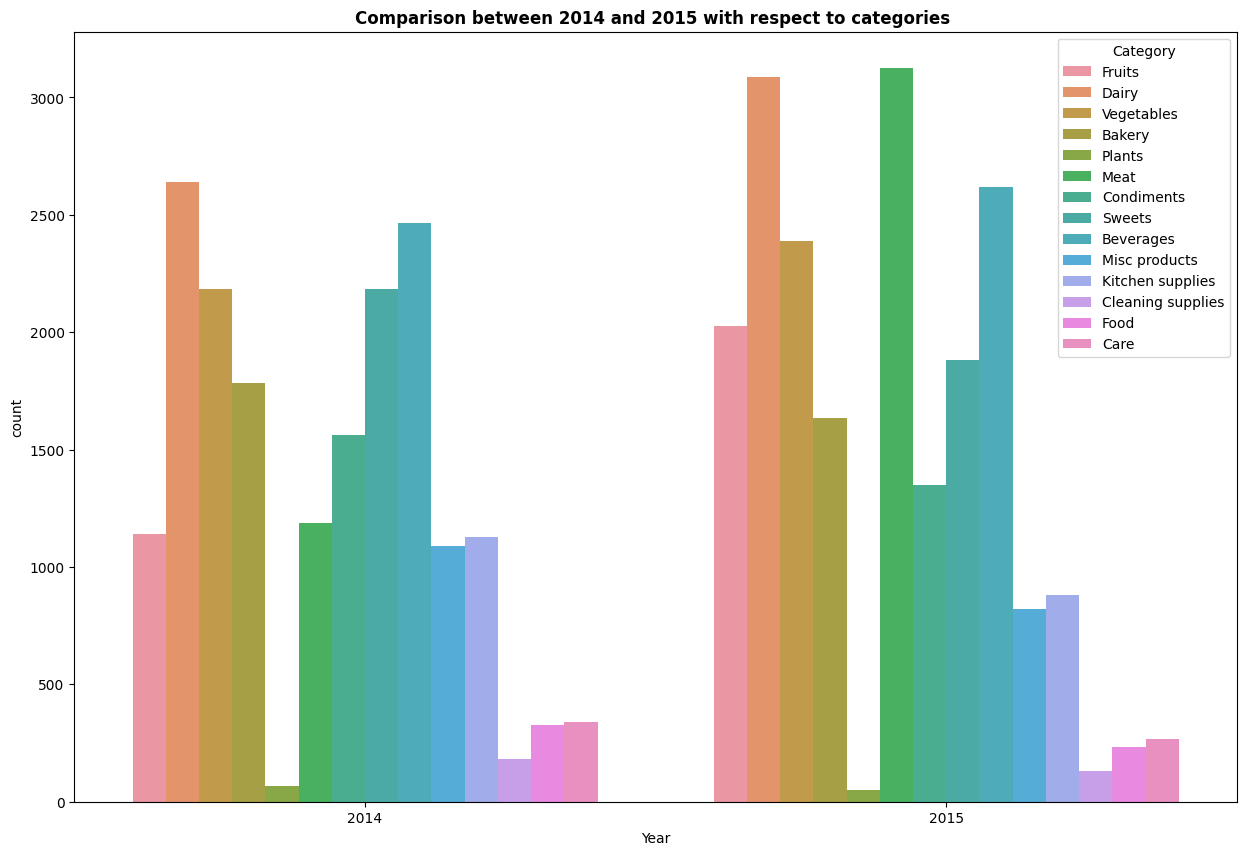

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Year', hue ='Category', data = df)
#sns.countplot(df['Year'], hue = df['Category'])
#df['Year'].value_counts()
plt.title("Comparison between 2014 and 2015 with respect to categories ", fontweight = 'bold', fontsize = 12)

Inferences :
- The yearly demand for each category is illustrated in the figure above , with the graphs indicating that meat has the highest demand in both the years while, and dairy has the second highest demand in 2015 and Beverages in 2014.

#### 2)Frequency of the categories in terms of items sold



In [ ]:
Frequency_ofitems = df.groupby(pd.Grouper(key = 'Category')).size().reset_index(name = 'count')
fig = px.treemap(Frequency_ofitems, path = ['Category'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Categories(Items) Sold',
    title_x = 0.5, title_font = dict(size = 15),
    height = 1000
)
fig.update_traces(textinfo = "label+value")
fig.show()

Inferences :
- The graph above shows that the "Dairy" category has the highest frequency of items sold, followed by "Vegetables." 
- In contrast, the categories of "Cleaning Supplies" and "Plants" are in the region with the least frequencies.

3) Variation in demand of different categories over months


In [ ]:
#Extracting month from the Date column

df['Month'] = df['Date'].dt.month
df.head()

Member_number       Date   itemDescription    Category  Year  Month
0           1808 2015-07-21    tropical fruit      Fruits  2015      7
1           2552 2015-05-01        whole milk       Dairy  2015      5
2           2300 2015-09-19         pip fruit      Fruits  2015      9
3           1187 2015-12-12  other vegetables  Vegetables  2015     12
4           3037 2015-01-02        whole milk       Dairy  2015      1

In [ ]:
df_temp = pd.DataFrame(df.groupby(['Month','Category'])['Category'].count())

In [ ]:
df_temp.rename(columns = {'Category': 'count'},inplace = True)
df_temp.reset_index(drop = False,inplace = True)

df_temp.sort_values(by = 'count', ascending = False)[:20]


Month    Category  count
103      8       Dairy    519
47       4       Dairy    518
33       3       Dairy    511
89       7       Dairy    502
145     11       Dairy    499
5        1       Dairy    491
61       5       Dairy    483
71       6   Beverages    470
131     10       Dairy    466
57       5   Beverages    459
75       6       Dairy    457
159     12       Dairy    435
29       3   Beverages    433
1        1   Beverages    433
117      9       Dairy    431
99       8   Beverages    429
141     11   Beverages    427
43       4   Beverages    423
83       6  Vegetables    414
19       2       Dairy    413

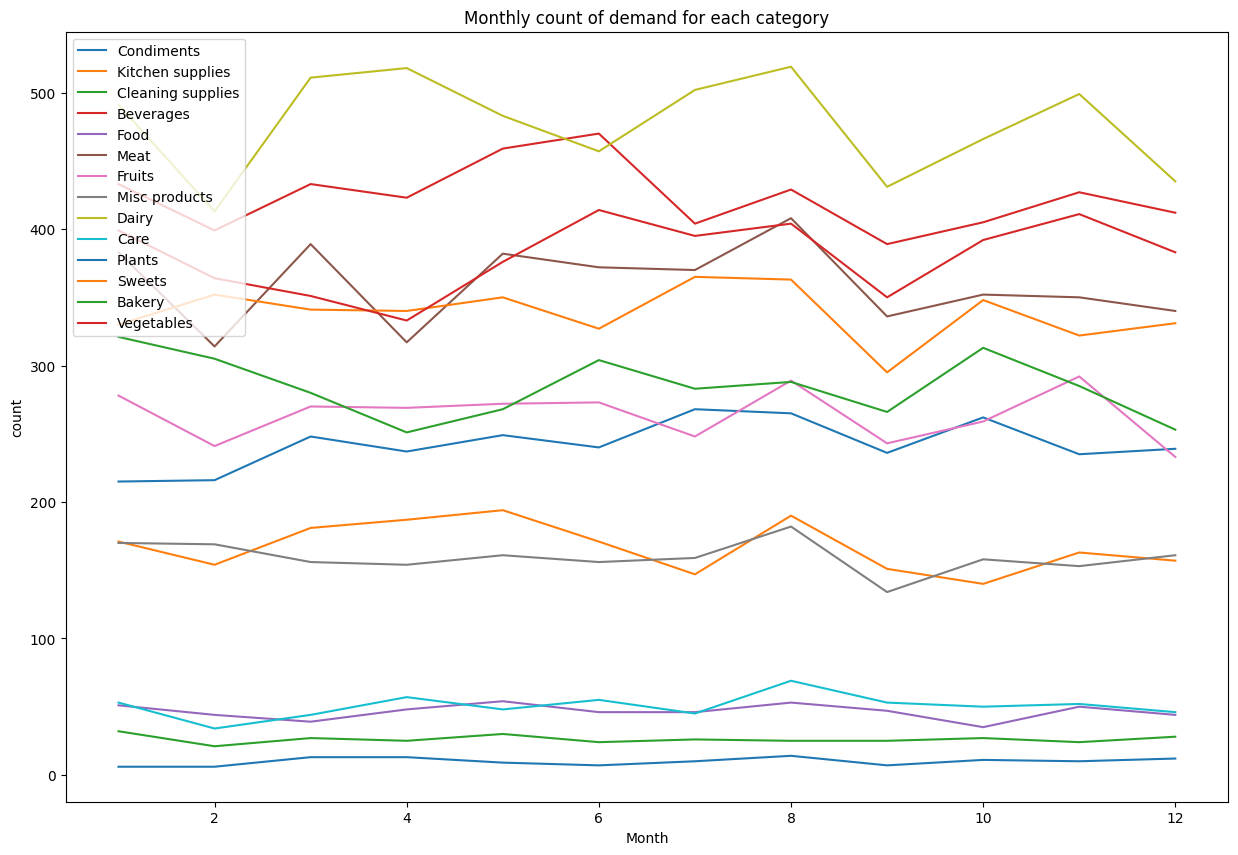

In [ ]:
#Plotting monthly count of demand for each category
categories = set(df_temp['Category'])

plt.figure(figsize=(15,10))
for category in categories:
     selected_data = df_temp.loc[df_temp['Category'] == category]
     plt.plot(selected_data['Month'], selected_data['count'], label = category)
plt.xlabel('Month')
plt.ylabel('count')
plt.legend()
plt.title('Monthly count of demand for each category')
plt.show()

Inferences : 
- The above graph focuses on analyzing monthly trends in demand for each category. 
- Observations suggest a significant variation in the range of counts for each category. 


4) Variation in demand of different categories over Week


In [ ]:
#Extracting week from the Date column

df['Week'] = df['Date'].dt.week
df.head()

Member_number       Date   itemDescription    Category  Year  Month  Week
0           1808 2015-07-21    tropical fruit      Fruits  2015      7    30
1           2552 2015-05-01        whole milk       Dairy  2015      5    18
2           2300 2015-09-19         pip fruit      Fruits  2015      9    38
3           1187 2015-12-12  other vegetables  Vegetables  2015     12    50
4           3037 2015-01-02        whole milk       Dairy  2015      1     1

In [ ]:
df_temp_2014 = df.loc[df['Year'] == 2014]
df_temp_2014 = pd.DataFrame(df_temp_2014.groupby(['Week','Category'])['Category'].count())
df_temp_2014.rename(columns = {'Category': 'count'},inplace = True)
df_temp_2014.reset_index(drop = False,inplace = True)
df_temp_2014

Week           Category  count
0       1             Bakery     38
1       1          Beverages     53
2       1               Care      3
3       1  Cleaning supplies      3
4       1         Condiments     27
..    ...                ...    ...
709    52   Kitchen supplies     27
710    52               Meat     24
711    52      Misc products     19
712    52             Sweets     43
713    52         Vegetables     55

[714 rows x 3 columns]

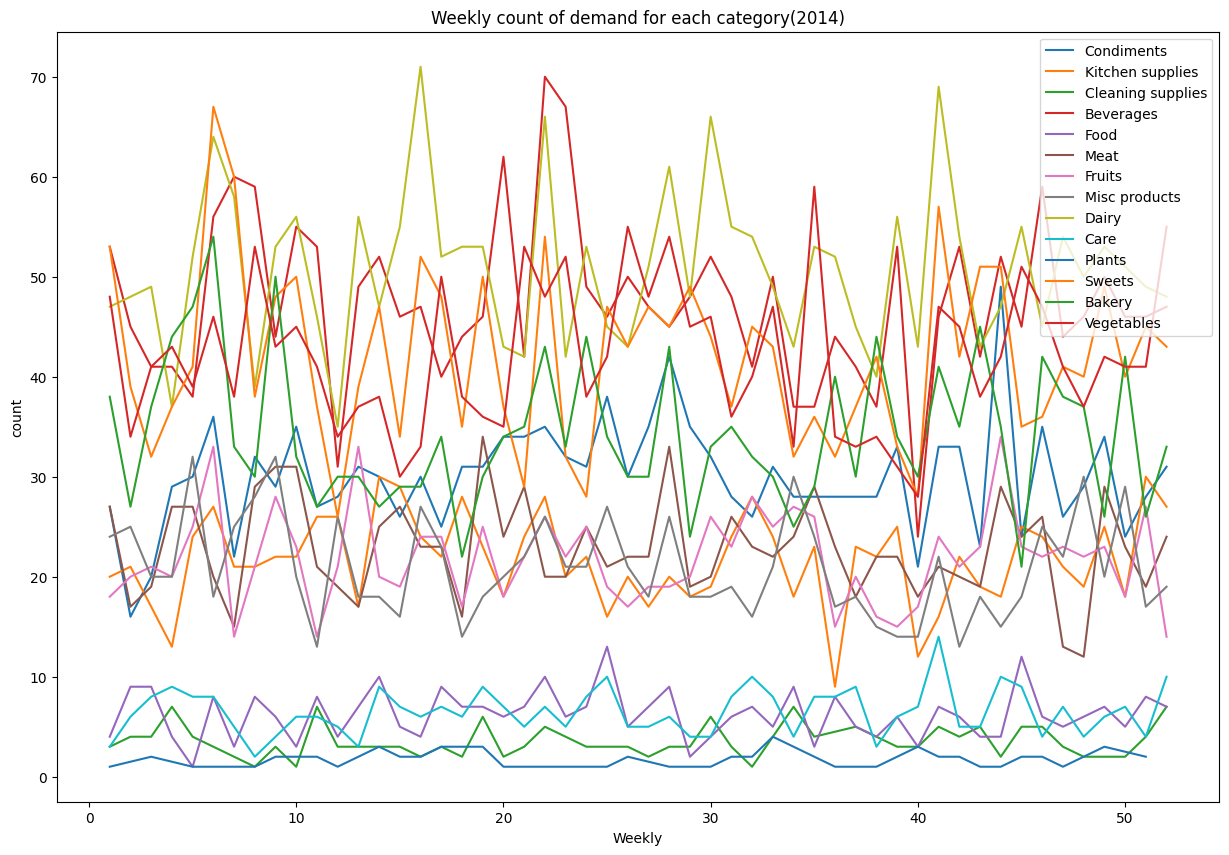

In [ ]:
#Plotting weekly count of demand for each category in the year 2014
categories = set(df_temp_2014['Category'])

plt.figure(figsize=(15,10))
for category in categories:
     selected_data = df_temp_2014.loc[df_temp_2014['Category'] == category]
     plt.plot(selected_data['Week'], selected_data['count'], label = category)
plt.xlabel('Weekly')
plt.ylabel('count')
plt.legend()
plt.title('Weekly count of demand for each category(2014)')
plt.show()

In [ ]:
df_temp_2015 = df.loc[df['Year'] == 2015]
df_temp_2015 = pd.DataFrame(df_temp_2015.groupby(['Week','Category'])['Category'].count())
df_temp_2015.rename(columns = {'Category': 'count'},inplace = True)
df_temp_2015.reset_index(drop = False,inplace = True)

df_temp_2015

Week           Category  count
0       1             Bakery     17
1       1          Beverages     33
2       1               Care      4
3       1  Cleaning supplies      2
4       1         Condiments     15
..    ...                ...    ...
713    53   Kitchen supplies      8
714    53               Meat     25
715    53      Misc products      4
716    53             Sweets     18
717    53         Vegetables     19

[718 rows x 3 columns]

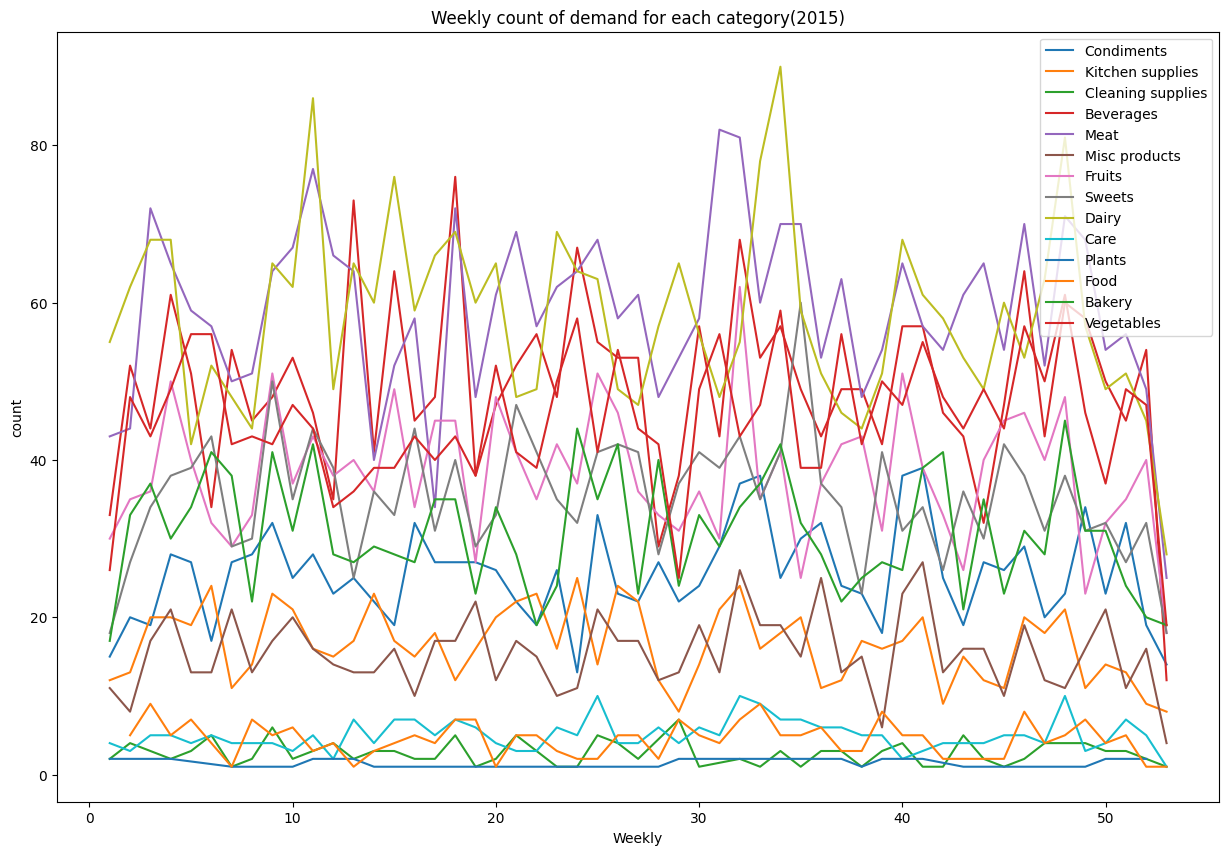

In [ ]:
#Plotting weekly count of demand for each category in the year 2015

categories = set(df_temp_2015['Category'])

plt.figure(figsize=(15,10))
for category in categories:
     selected_data = df_temp_2015.loc[df_temp_2015['Category'] == category]
     plt.plot(selected_data['Week'], selected_data['count'], label = category)
plt.xlabel('Weekly')
plt.ylabel('count')
plt.legend()
plt.title('Weekly count of demand for each category(2015)')
plt.show()

Inferences:
- The above figures shows a more in-depth analysis of the demand for each category, plotted over two years. 
- The first Figure illustrates the demands for the year 2014, while the second represents the demands for the year 2015. 
- It can be observed that some categories overlap, and we observe similar demand trends for these categories.

4) Variation in demand of different categories on daily basis

In [ ]:
df.set_index('Date',inplace=True)

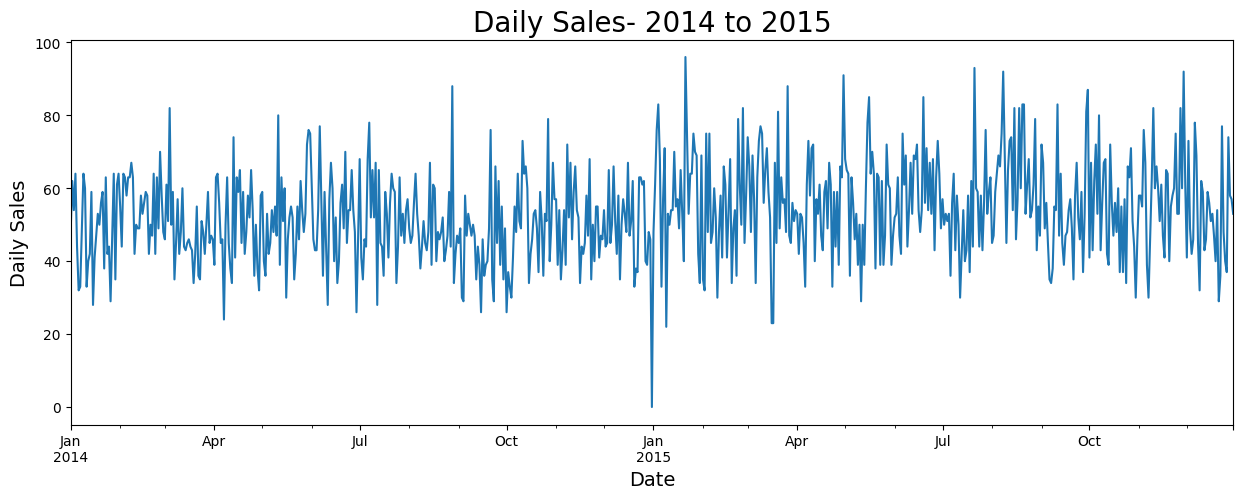

In [ ]:
#Resampling data for plotting demand for each day timeframe
df.resample('D')[['itemDescription']].count().plot(kind='line',figsize=(15,5),legend=None)
plt.title('Daily Sales- 2014 to 2015',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Daily Sales',fontsize=14)
plt.show()

Inferences:
- The graph above indicates a consistent pattern in daily sales from 2014 to 2015, with the exception of a dip in January 2015. 
- The cause of this dip is uncertain and may be attributed to various factors such as inflation, among others.

Results Part 1 :
- In all the above graphs and eda, where we are trying to look into variation in demand of different categories over months, weeks and on day to daily basis. 
- It can observed that there are few factors and categories which have a significant amount of dominance on the whole patterns and trends


### **Midterm Project Part II** :
1. Are there seasonal or trend-based patterns in customers' purchasing behavior 
that can be identified and accounted for in a forecasting model?
2. What is the most appropriate forecasting method for this type of data (e.g. time series analysis, regression analysis, machine learning algorithms), and how can its accuracy be evaluated?
3. How can data preprocessing techniques such as feature scaling, outlier detection, or missing value imputation improve the accuracy of a forecasting model?



We will be focusing on the top 3 categories which have maximum demand that were analyzed in the previous section. These are:
1. Beverages
2. Dairy
3. Vegetables

### **Time Series Analysis**

In [ ]:
#Importing the libraries
import statsmodels.api as sm

#Loading the original data 
try_df = pd.read_csv('/content/drive/MyDrive/Usable AI/Groceries Dataset/Groceries_dataset.csv', index_col='Date', parse_dates=True)

In [ ]:
#Checking for null values
try_df.isnull().sum()

Member_number      0
itemDescription    0
dtype: int64

- Next, we include plotting the monthly sales data and decompose the time series into its trend, seasonal and residual components.


In [ ]:
#Resampling the data to monthly data
monthly_data = try_df.resample('M').sum()

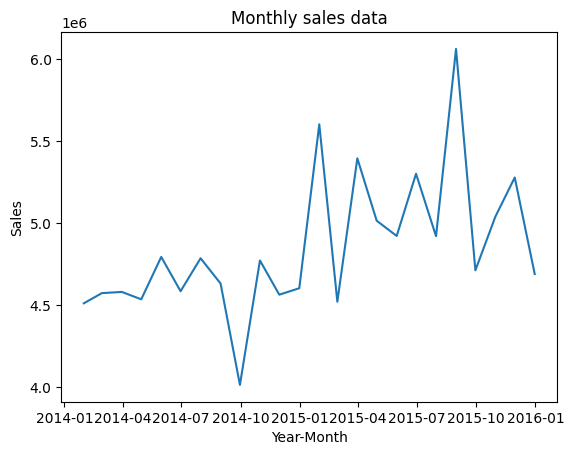

In [ ]:
#Plotting the monthly groceries data
fig, ax =plt.subplots()
ax.plot(monthly_data)
ax.set(title = 'Monthly sales data', xlabel = 'Year-Month', ylabel = 'Sales')
plt.show()

#Decomposing the time series into components
decomp = sm.tsa.seasonal_decompose(monthly_data, model ='multiplicative')

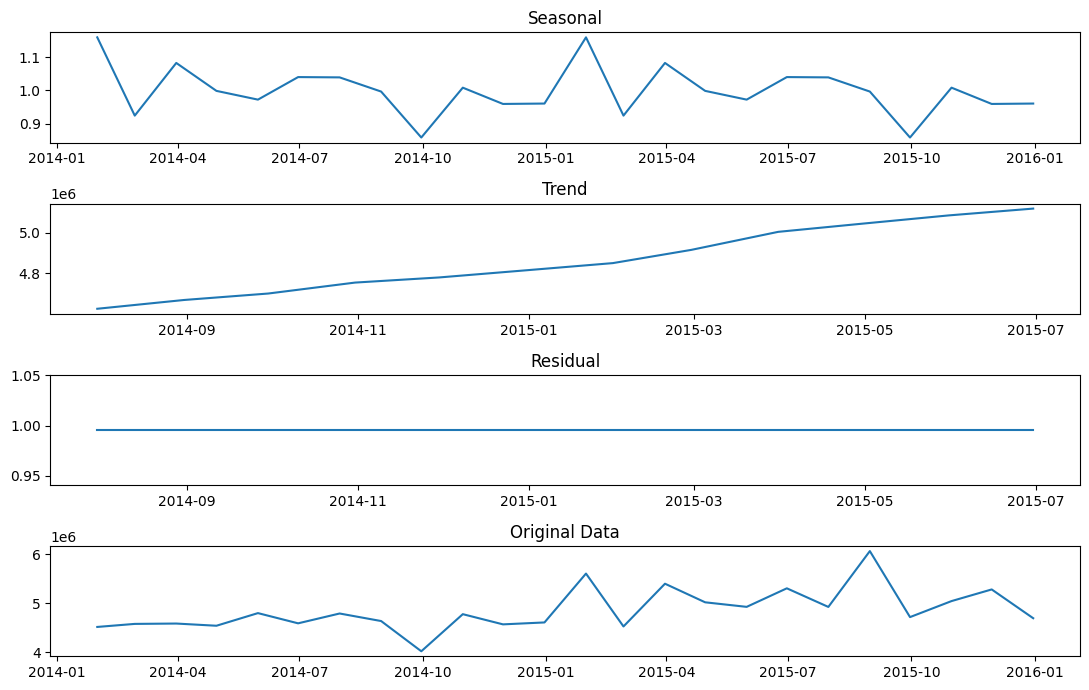

In [ ]:
#Plotting the seasonal, trend and residual components

plt.figure(figsize = (11,7))
plt.subplot(4,1,1)
plt.plot(decomp.seasonal)
plt.title('Seasonal')
plt.subplot(4,1,2)
plt.plot(decomp.trend)
plt.title('Trend')
plt.subplot(4,1,3)
plt.plot(decomp.resid)
plt.title('Residual')
plt.subplot(4,1,4)
plt.plot(monthly_data)
plt.title('Original Data')
plt.tight_layout()
plt.show()



The decomposition functionality gives us 3 of the following elements:
1. trend — the general direction of the series over 24 months(2 years) for all the data items present
2. seasonality — a distinct, repeating pattern observed in regular intervals due to various seasonal factors, which was monthly in our case
3. residual — the irregular component consisting of the fluctuations in the time series after removing the previous components


## Drilling deeper down into categories(Top 3) of items and their trend analyses

Analysing trend for "Beverages" category for Monthly timeframe

In [ ]:
#Sorting the data into a dataframe with required columns 
df_top = pd.DataFrame(df.groupby(['Month','Category','Year'])['Category'].count())
df_top.rename(columns = {'Category': 'count'},inplace = True)
df_top.reset_index(drop = False,inplace = True)
df_top.head()

Month   Category  Year  count
0      1     Bakery  2014    173
1      1     Bakery  2015    148
2      1  Beverages  2014    197
3      1  Beverages  2015    236
4      1       Care  2014     32

<Axes: xlabel='Month'>

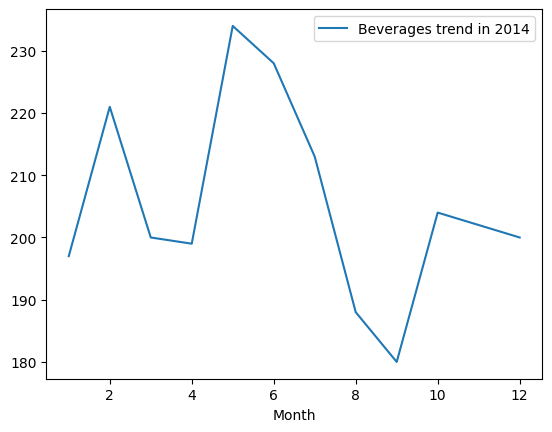

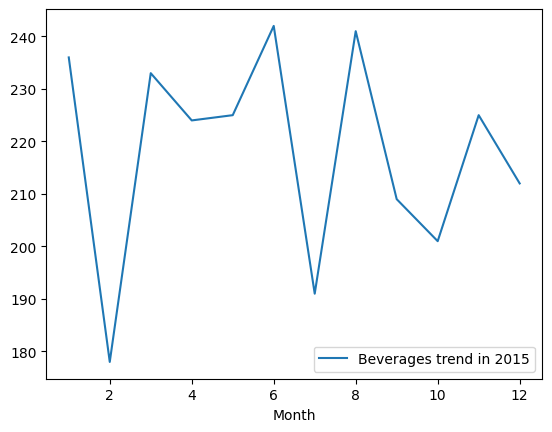

In [ ]:
#Filtering out records for the 'Beverages' category
df_bev = df_top.loc[df_top['Category'] == 'Beverages']
df_bev.head()

#Creating dataframes and plotting demand graph for beverages in the years 2014 and 2015
data_sel_2014 = df_bev.loc[df_bev['Year'] == 2014]
data_sel_2014.plot(x = 'Month',y = 'count',label = 'Beverages trend in 2014')


data_sel_2015 = df_bev.loc[df_bev['Year'] == 2015]
data_sel_2015.plot(x = 'Month',y = 'count',label = 'Beverages trend in 2015')

Insight: The two graphs above represent the demand of beverages over the years 2014 and 2015. This gave us a general idea of how the demand might be dipping around the months 3-5 and around 9-10.

In [ ]:
#Combining data for only 'Beverages' category
df_sel = df.reset_index()[['Date','Category']].copy()
date_bev = df_sel.loc[df_sel['Category'] == 'Beverages']
date_bev.set_index("Date",inplace = True)
date_bev['count'] = 1


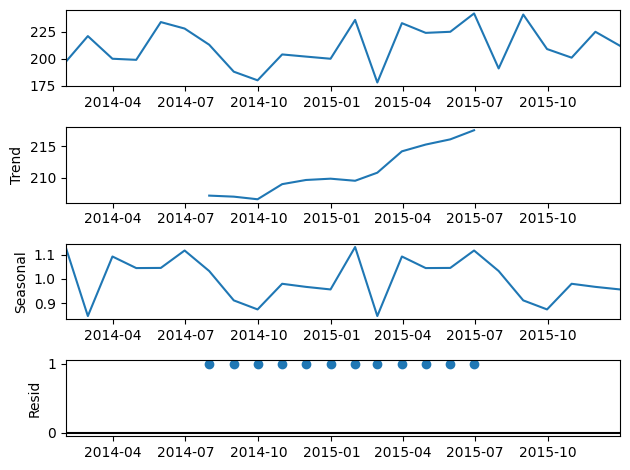

In [ ]:
#Seasonal decomposition for trend analysis of Beverages
date_bev_monthly_data = date_bev.resample('M').sum()
#date_bev_monthly_data.head()


#Multiplicative model
decompose_result_mult = sm.tsa.seasonal_decompose(date_bev_monthly_data,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Insight: The idea of trends that we observed by plotting the monthly demand was generalised in the decomposition graph above. The seasonal pattern might not be the most reliable one,since we have historical data for only past 2 years.

**Analysing demands for "Dairy" category**


<Axes: xlabel='Month'>

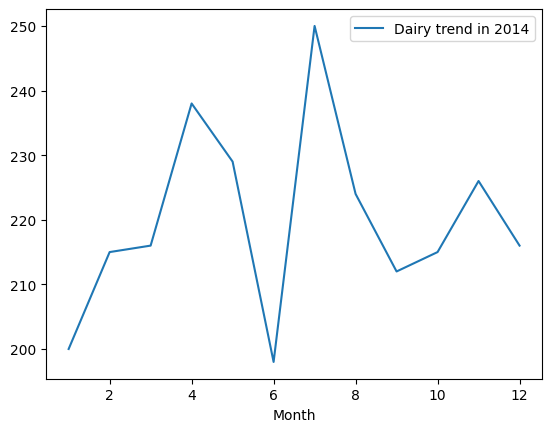

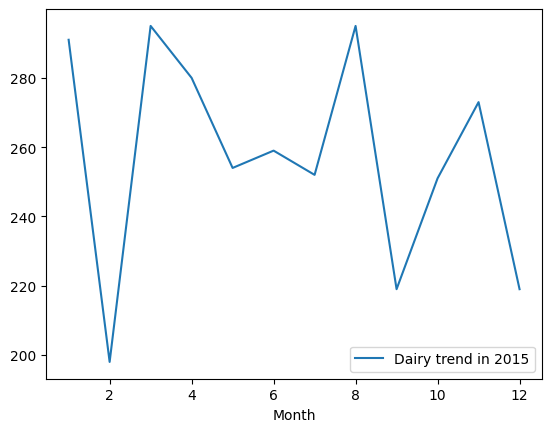

In [ ]:
#Selecting data for the 'Dairy' category
df_dairy = df_top.loc[df_top['Category'] == 'Dairy']
df_dairy.head()

#Creating dataframes and plotting demand graph for dairy in the years 2014 and 2015
data_sel_2014 = df_dairy.loc[df_dairy['Year'] == 2014]
data_sel_2014.plot(x = 'Month',y = 'count',label = 'Dairy trend in 2014')


data_sel_2015 = df_dairy.loc[df_dairy['Year'] == 2015]
data_sel_2015.plot(x = 'Month',y = 'count',label = 'Dairy trend in 2015')

Insight: Similar to the beverages category,we tried to understand the general trend of demand for the Dairy category. The data for 2 years is quite varied to be generalised.




In [ ]:
#Collecting the data for 'Dairy' category
date_dairy = df_sel.loc[df_sel['Category'] == 'Dairy']
date_dairy.set_index("Date",inplace = True)
date_dairy['count'] = 1


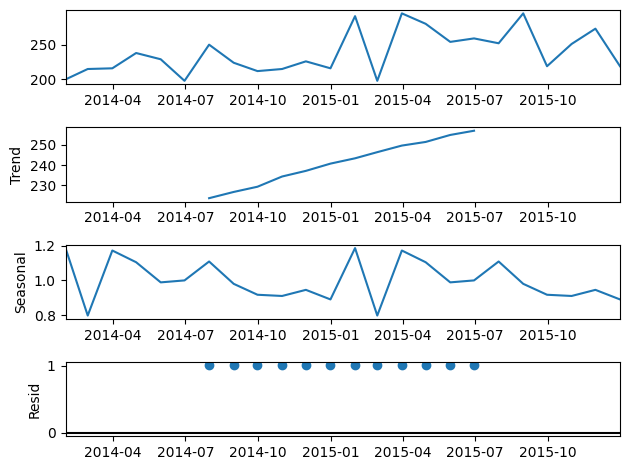

In [ ]:
#Seasonal decomposition for trend analysis of Dairy for monthly timeframe
date_dairy_monthly_data = date_dairy.resample('M').sum()
date_dairy_monthly_data.head()


#Multiplicative model
decompose_result_mult = sm.tsa.seasonal_decompose(date_dairy_monthly_data,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Insight: The general trend captured during decomposition of demand for Dairy category seems to be positively increasing. The seasonal pattern shows a dip around the month of March.

**Analysing trends for "Vegetables" category**

<Axes: xlabel='Month'>

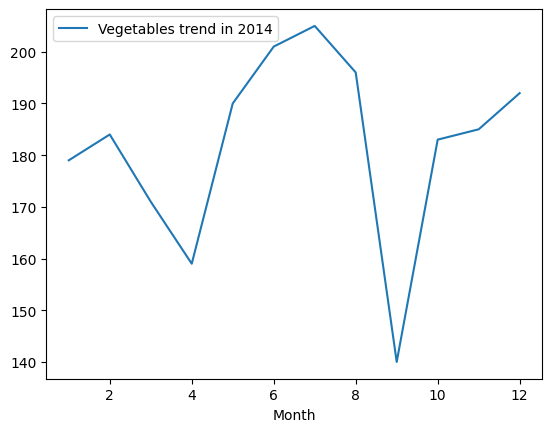

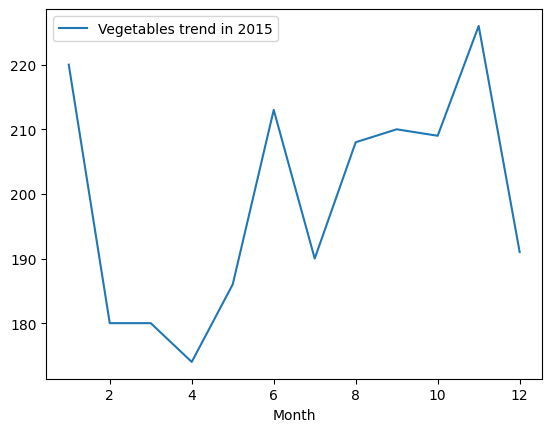

In [ ]:
#Segregrating data for 'Vegetables' category
df_veg = df_top.loc[df_top['Category'] == 'Vegetables']
df_veg.head()

#Creating dataframes and plotting demand graph for beverages in the years 2014 and 2015
data_sel_2014 = df_veg.loc[df_veg['Year'] == 2014]
data_sel_2014.plot(x = 'Month',y = 'count',label = 'Vegetables trend in 2014')


data_sel_2015 = df_veg.loc[df_veg['Year'] == 2015]
data_sel_2015.plot(x = 'Month',y = 'count',label = 'Vegetables trend in 2015')

Insight: Similar to the previous categories,we tried to understand the general trend of demand for the Vegetables category

In [ ]:
date_veg = df_sel.loc[df_sel['Category'] == 'Vegetables']
date_veg.set_index("Date",inplace = True)
date_veg['count'] = 1


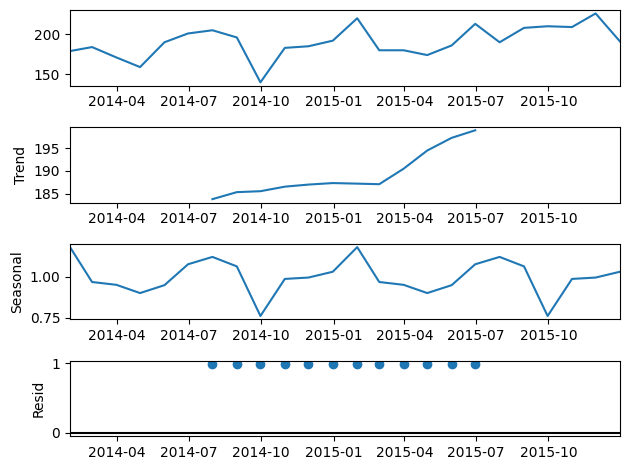

In [ ]:
#Seasonal decomposition for trend analysis of Vegetables for monthly timeframe
date_veg_monthly_data = date_veg.resample('M').sum()
date_veg_monthly_data.head()


#Multiplicative model
decompose_result_mult = sm.tsa.seasonal_decompose(date_veg_monthly_data,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Insight: The generalised trend for 'Vegetables' category seem to be increasing slowly and then exponentially after around March. The seasonal graph clearly shows a dip around the month of October, and high demand in the beginning of the year.

Result Part II : 
- Firstly, we have identified seasonal and trend-based patterns in customers' purchase behavior, which we observed across three categories. 
- Given the large amount of data and the potential for unreliable data, we plan to develop a forecasting model that takes into account the observed trend patterns for the top three categories.

### Following are the research and design questions which are the further steps and will be the focus on the next part of the study :

1. What are the trade-offs between a simpler, more interpretable forecasting model and a more complex, potentially more accurate model, and how can these trade-offs be optimized for the specific business problem at hand?
2. Experimenting with the timeframe factor - whether to consider daily or monthly data make a difference in the accuracy of the predictions.
3. Using automated models/libraries and different methods to find the most accurate predictions.Following is the summary of steps undertaken further:
  1.   Using auto arima to find the best hyperparameters.

  2.   Training SARIMA model to fit the data with params identified in a.

  3. Optmising results using 'Walk forward optimisation' method.
  4. Experimenting with Prophet model predictions.

For the purpose of experimentation, we have implemented all the above mentioned steps on 'Beverages' category.








In [ ]:
#Compiling data for 'Beverages' category
date_bev.reset_index(drop = False,inplace = True)
bev = pd.DataFrame(date_bev.groupby('Date')['count'].sum())

In [ ]:
bev_monthly = df_top[df_top['Category'] == 'Beverages'].groupby(['Month','Year'])['count'].sum()
bev_monthly = pd.DataFrame(bev_monthly).reset_index(drop = False)
bev_monthly.sort_values(by = ['Year','Month'],inplace = True)

Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF)

ACF and PACF of each of the stationary series are then calculated through the loops shown below. Confidence intervals for each function are also calculated. If the value is outside the boundaries of its respective confidence intervals, the value is considered significantly different from zero. This is the same as how we interpret spikes in ACF and PACF plots.

From the above graphs, we chose the highest lags with the greatest sum from each of the plot for p and q.
Since the timeframe for data is monthly, we take m = 12

#AUTOARIMA

In [ ]:
bev_monthly.head()
bev_monthly['month'] = (bev_monthly['Month']).astype(str) + '-' + (bev_monthly['Year']).astype(str)
bev_monthly.head()

Month  Year  count   month
0      1  2014    197  1-2014
2      2  2014    221  2-2014
4      3  2014    200  3-2014
6      4  2014    199  4-2014
8      5  2014    234  5-2014

In [ ]:
#Test for checking if the data is stationary
result = adfuller(bev_monthly['count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.058803
p-value: 0.261399
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


We notice that the p-value is greater than 0.05 hence we reject the null hypothesis and consider this series to be non-stationary.
We did observe a periodic component in the data, so transformations will  be necessary to make the data stationary. 

<Axes: xlabel='month'>

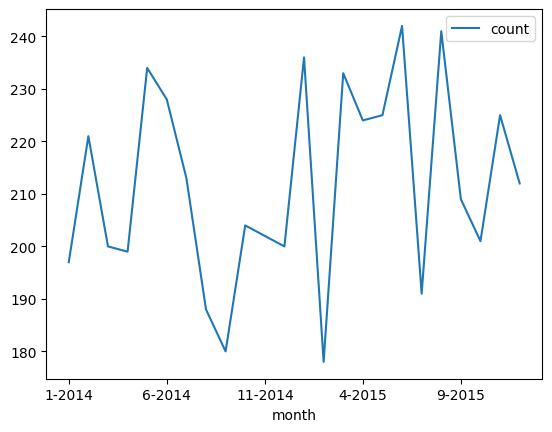

In [ ]:
#Plotting monthly demand for Beverages category
bev_monthly = bev_monthly[['month','count']]

bev_monthly.plot(x = 'month',y = 'count')

To find d paramerer, we will use differencing method.

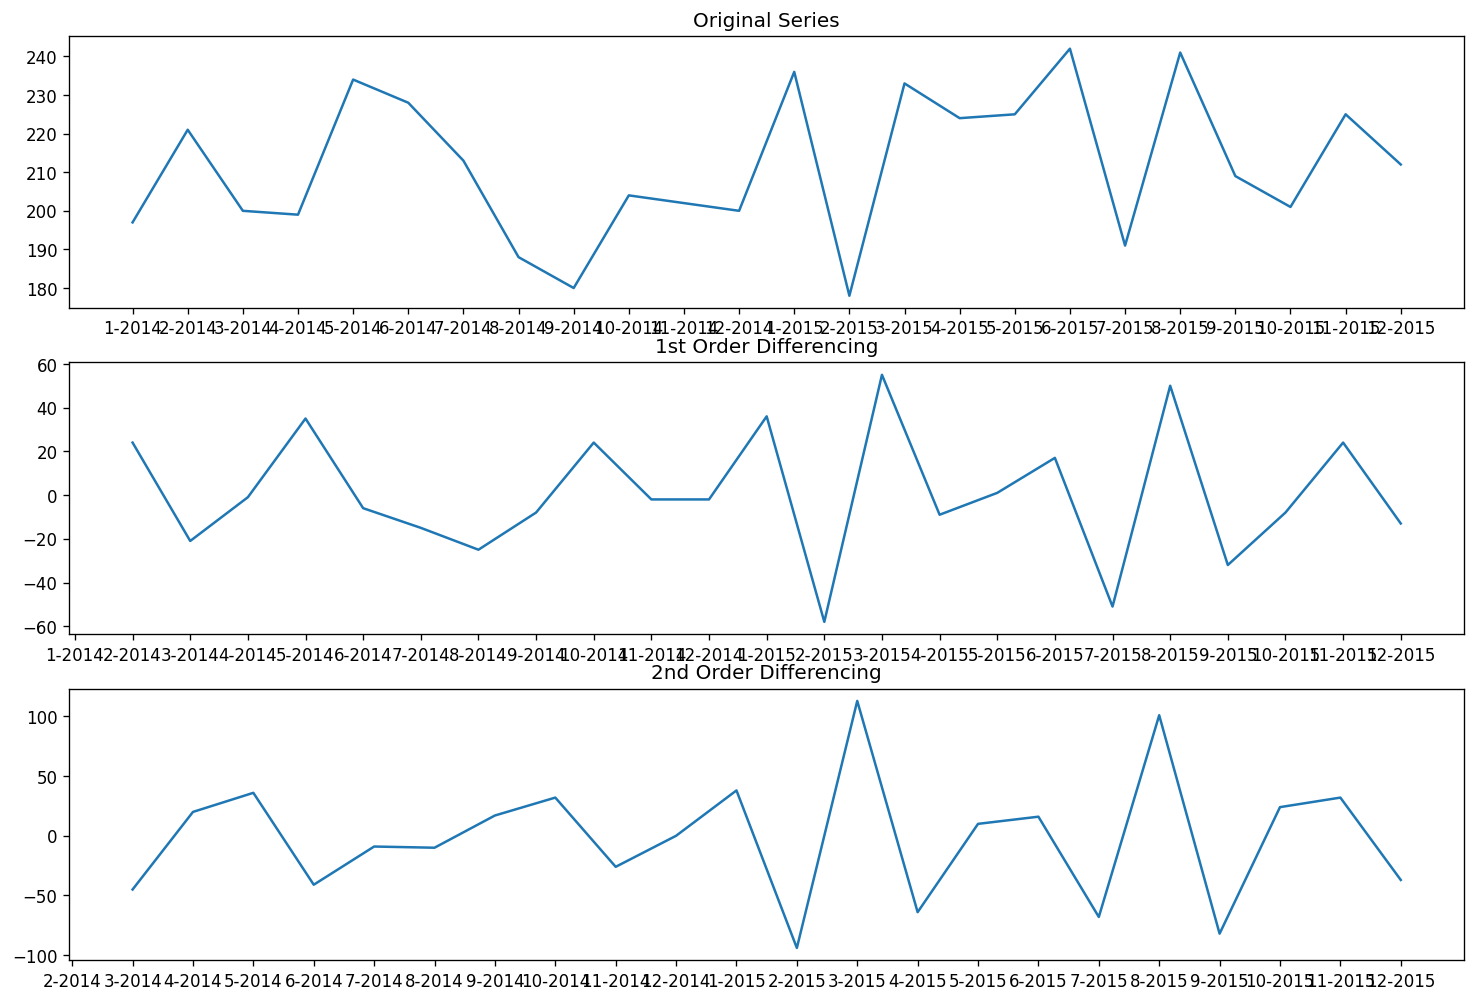

In [ ]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(bev_monthly['month'],bev_monthly['count']); ax1.set_title('Original Series'); #ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(bev_monthly['month'],bev_monthly['count'].diff()); ax2.set_title('1st Order Differencing'); #ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(bev_monthly['month'],bev_monthly['count'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

We observe less noise in the second order differencing but we verify this with autocorrelation plot; d = 2

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

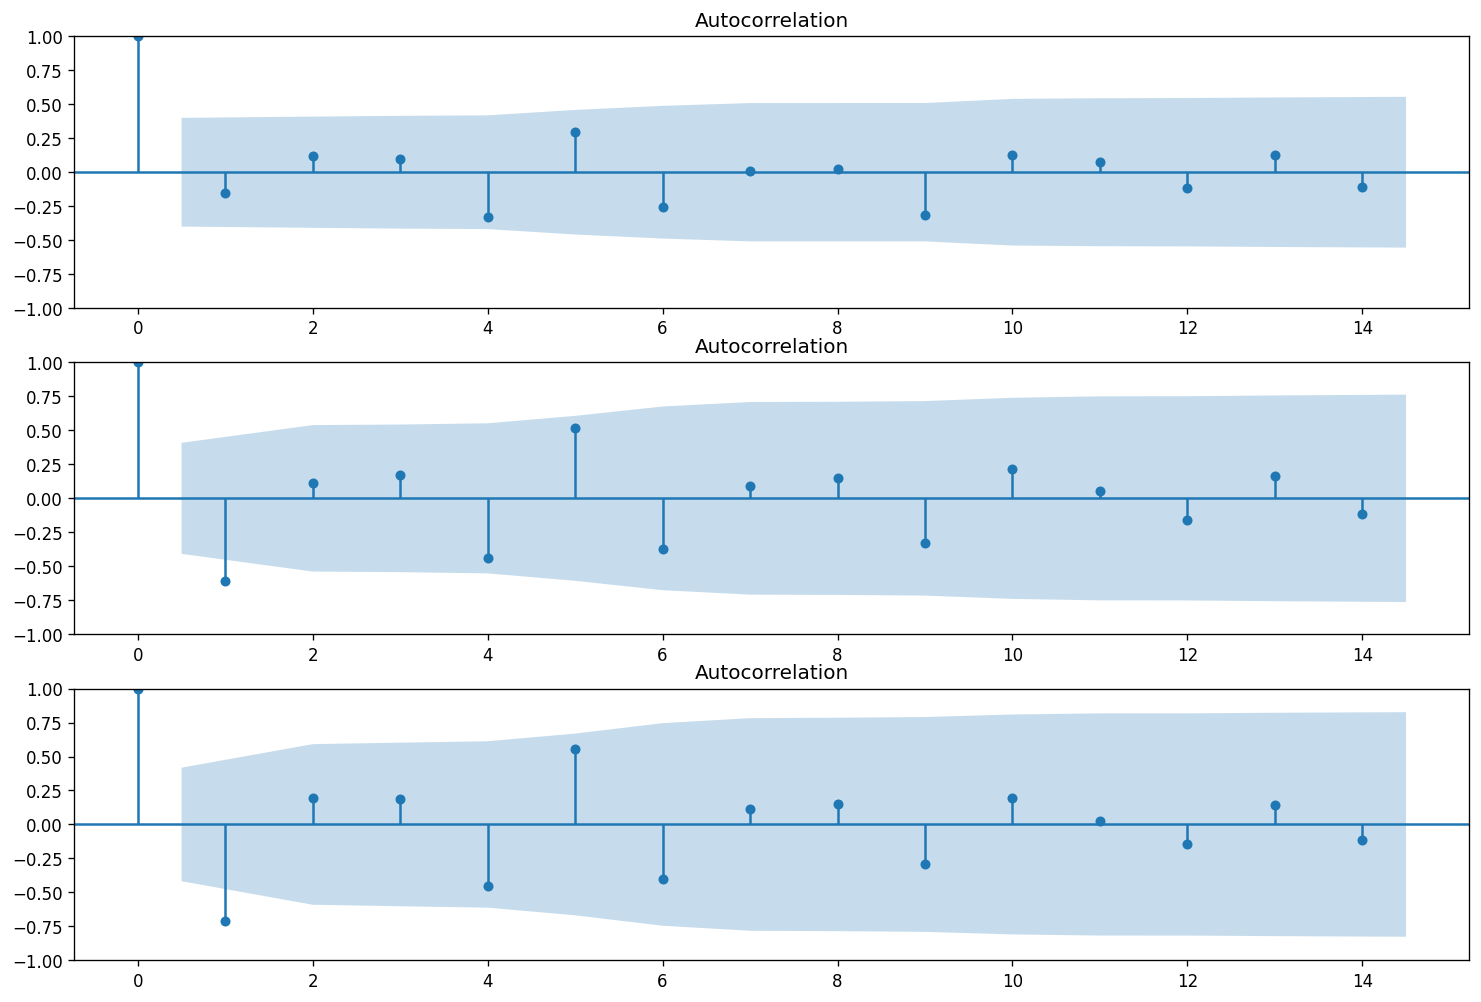

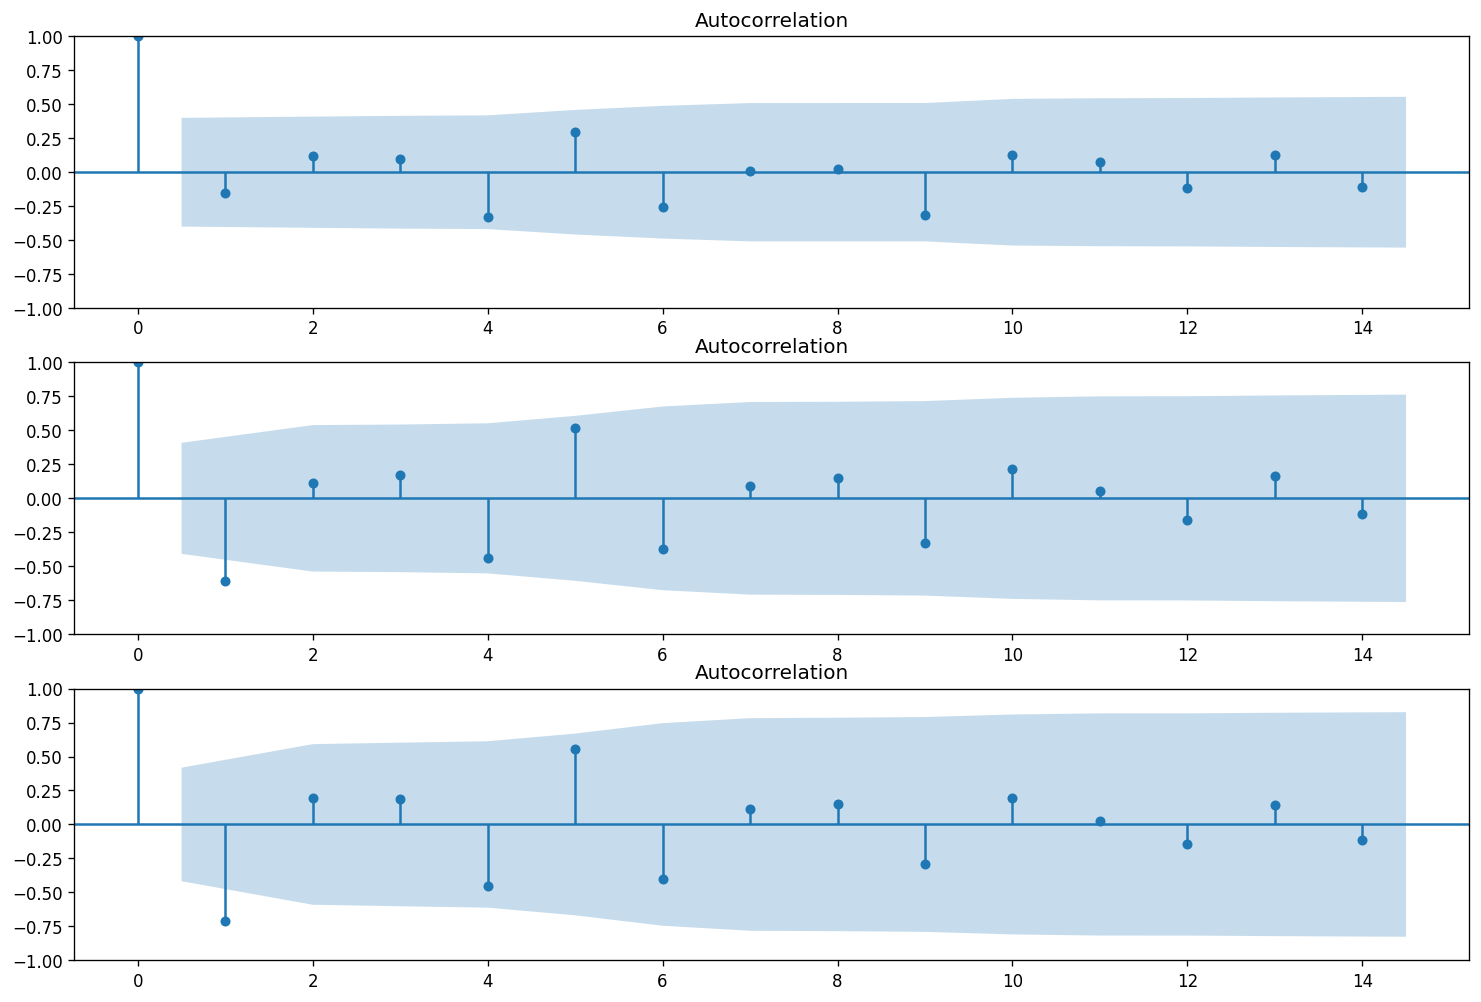

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(bev_monthly['count'],ax=ax1)
plot_acf(bev_monthly['count'].diff().dropna(),ax=ax2)
plot_acf(bev_monthly['count'].diff().diff().dropna(),ax=ax3)

For finding the p parameter

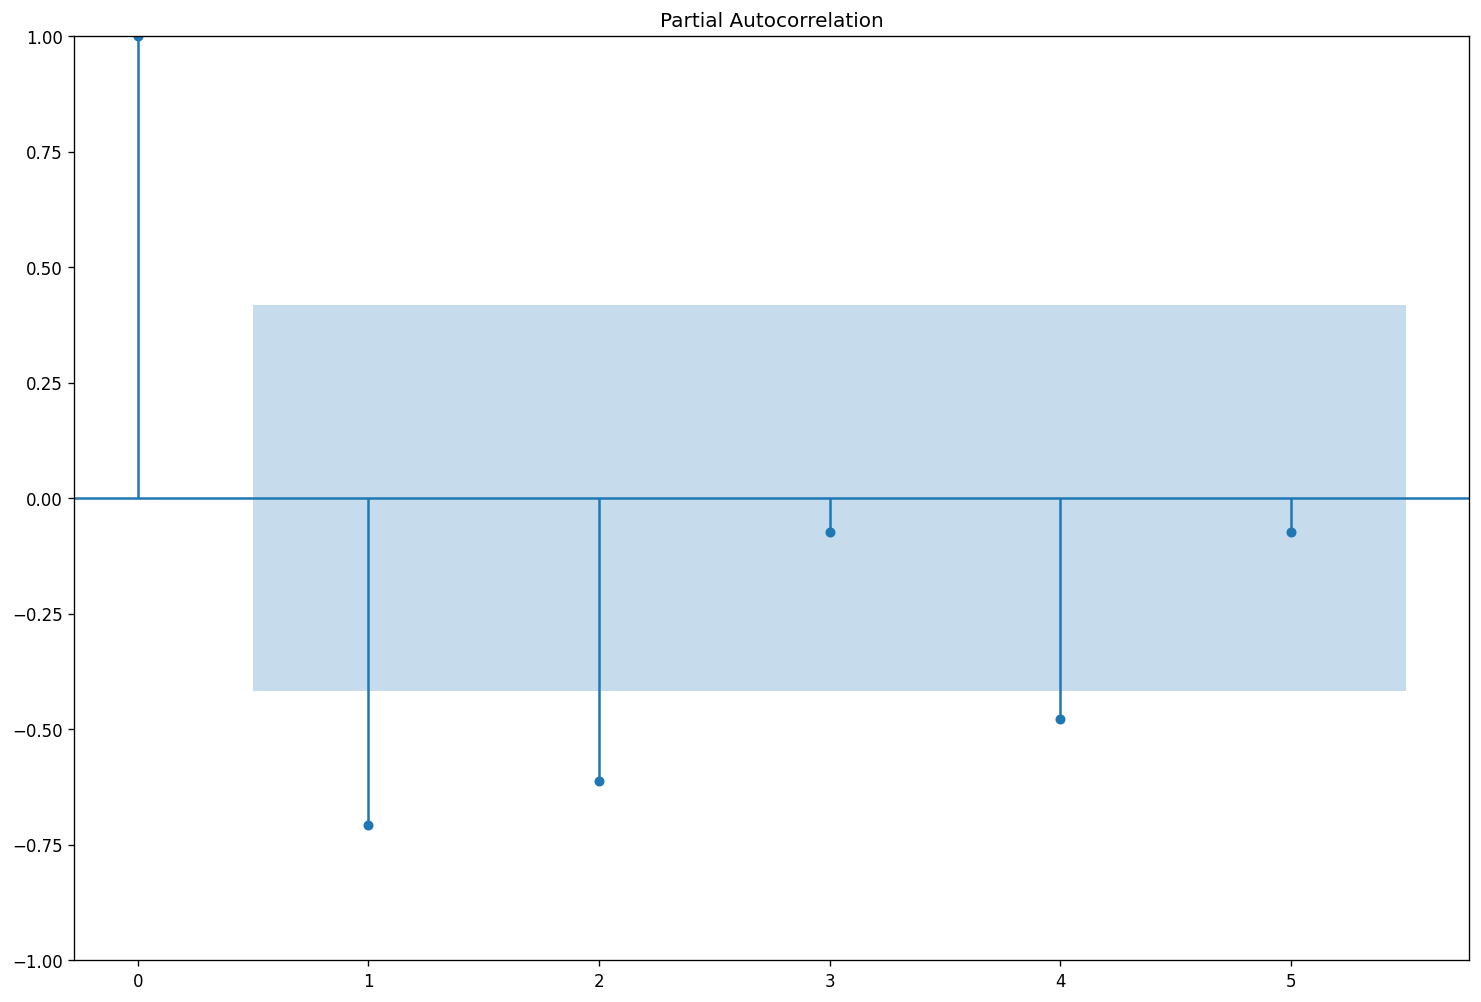

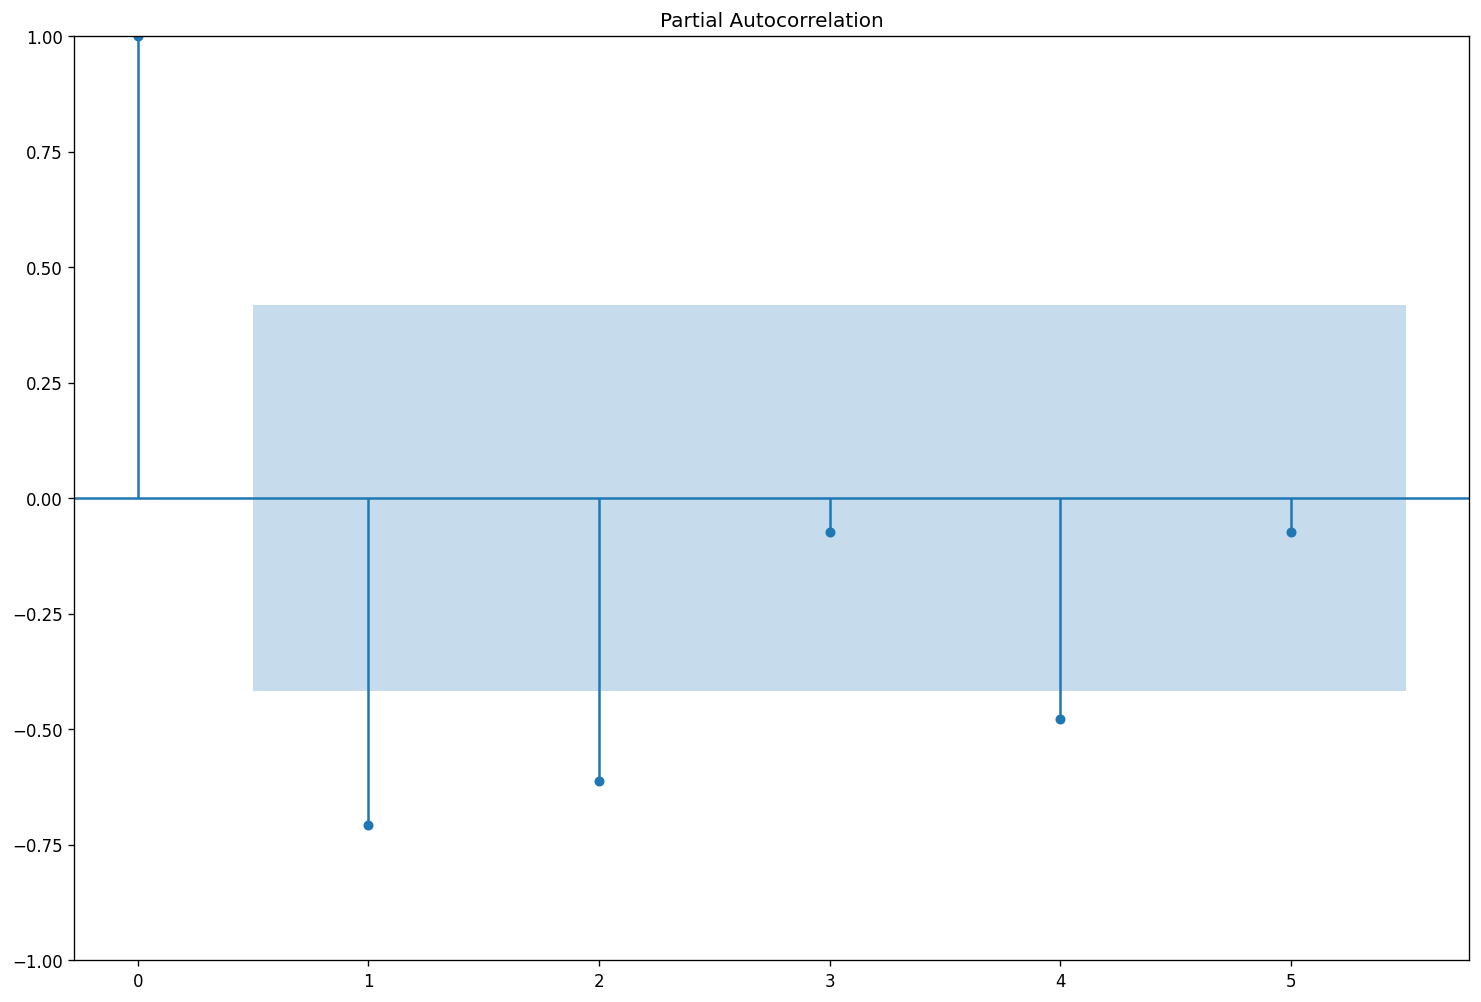

In [ ]:
plot_pacf(bev_monthly['count'].diff().diff().dropna(),method='ywmle',lags = 5)

We choose p = 2 since the first two lags are significantly out of the limit 

For finding q parameter: we plot ACF plot

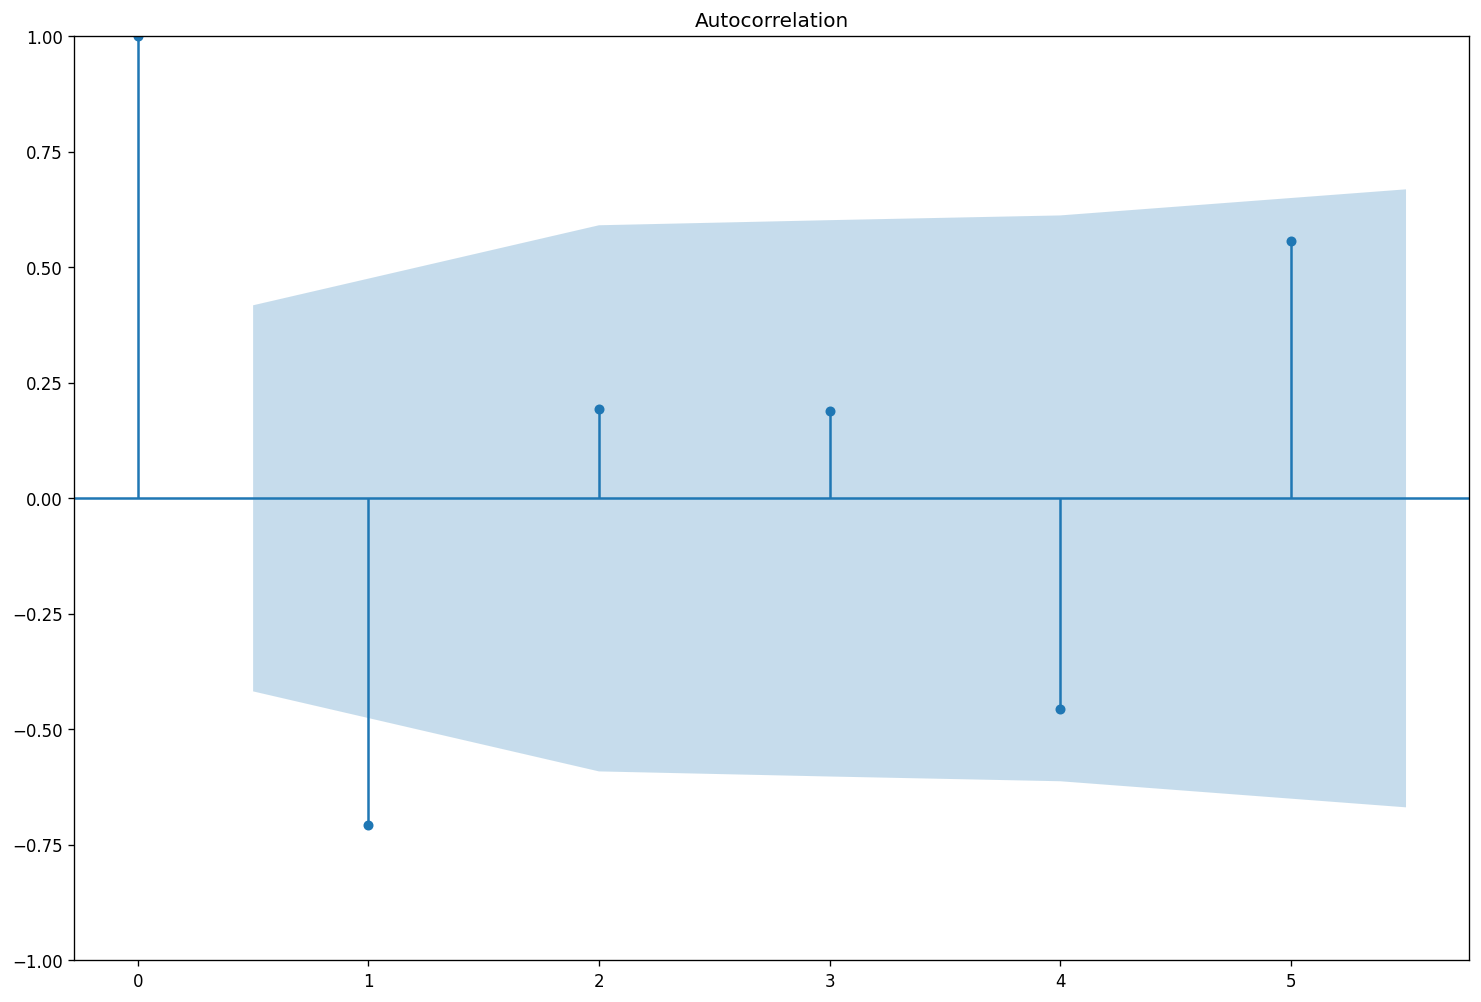

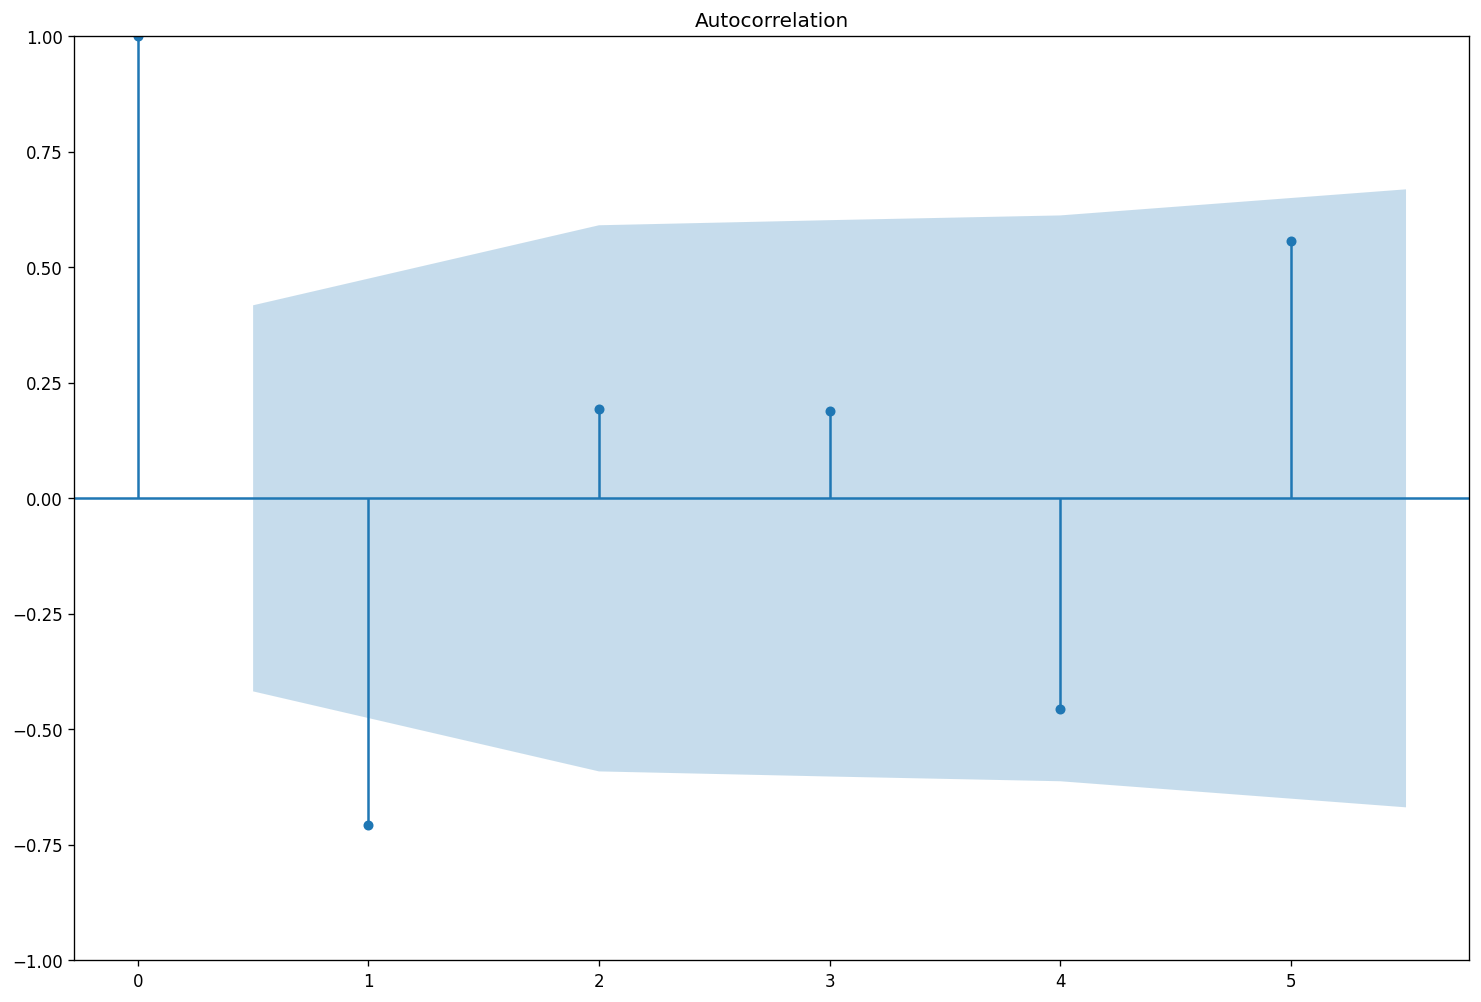

In [ ]:
plot_acf(bev_monthly['count'].diff().diff().dropna(),lags = 5)



```
# This is formatted as code
```

Choosing q = 2(Moving average)

In [ ]:
#Fitting a model on the above parameters
model_auto = pm.auto_arima(bev_monthly['count'],seasonal = True,m = 12)
model_auto

#indicates data is white noise

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

Since the monthly data that we considered was not implying any seasonality trends, we drilled further down into daily data for the same 'Beverages' category.
The auto arima helped us identify the appropriate parameters which we tried to find using manual plots above.In general, we would trust auto.arima() more than a hand-crafted call to arima.

#Beverages (Daily) - Auto ARIMA

In [ ]:
bev.reset_index(inplace = True)

In [ ]:
bev_copy = bev.copy(deep = True)
bev_copy.head()

Date  count
0 2014-01-01      7
1 2014-01-02     10
2 2014-01-03     11
3 2014-01-04      9
4 2014-01-05      5

In [ ]:
#bev_copy.reset_index(drop = False, inplace = True)
bev_copy.set_index('Date',inplace = True)
idx = pd.date_range(bev_copy.index.min(), bev_copy.index.max())
bev_copy.index = pd.DatetimeIndex(bev_copy.index)
bev_copy.head()

count
Date             
2014-01-01      7
2014-01-02     10
2014-01-03     11
2014-01-04      9
2014-01-05      5

In [ ]:
#Feature Engineering
#Using the reindex function to fill the missing dates from min to max date range as mentioned, and fill their corresponding count value with 0
bev_copy = bev_copy.reindex(idx, fill_value=0)
len(bev_copy)


729

In [ ]:
bev_copy.reset_index(inplace = True)
bev_copy.head()

index  count
0 2014-01-01      7
1 2014-01-02     10
2 2014-01-03     11
3 2014-01-04      9
4 2014-01-05      5

<Axes: title={'center': 'Daily demand for Bevrages over the 2 years'}, xlabel='Date', ylabel='Count'>

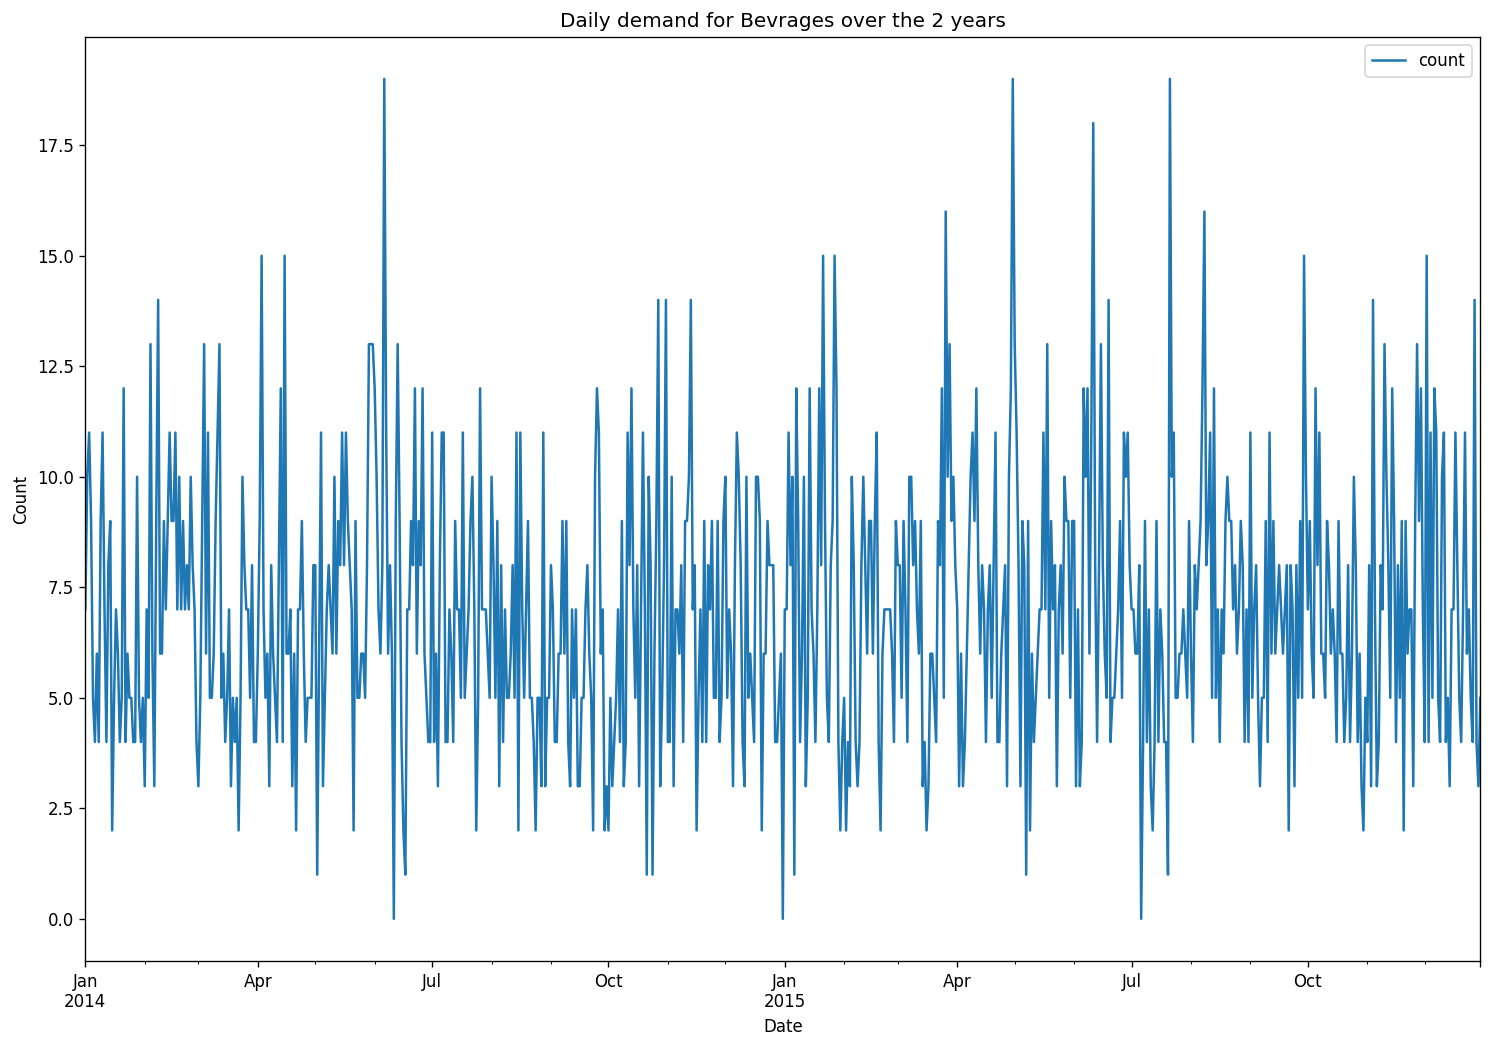

In [ ]:
#Plotting Daily demand for Bevrages over the 2 years
bev_copy.plot(x = 'index', y = 'count',xlabel = 'Date',ylabel = 'Count',title = 'Daily demand for Bevrages over the 2 years')

In [ ]:
#Splitting the data and train and test datasets
train_df = bev_copy.loc[:len(bev_copy)*0.9]
test_df = bev_copy.loc[len(bev_copy)*0.9:]

In [ ]:
train_df.rename(columns = {'index':'Date'},inplace = True)

In [ ]:
#Checking if the data is stationary; otherwise differentiate
result = adfuller(train_df['count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.795225
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


Our test statistic, p value was zero indicating no need of further processing the data.We did not observe a periodic component in the data, so transformations will not be necessary to make the data stationary.

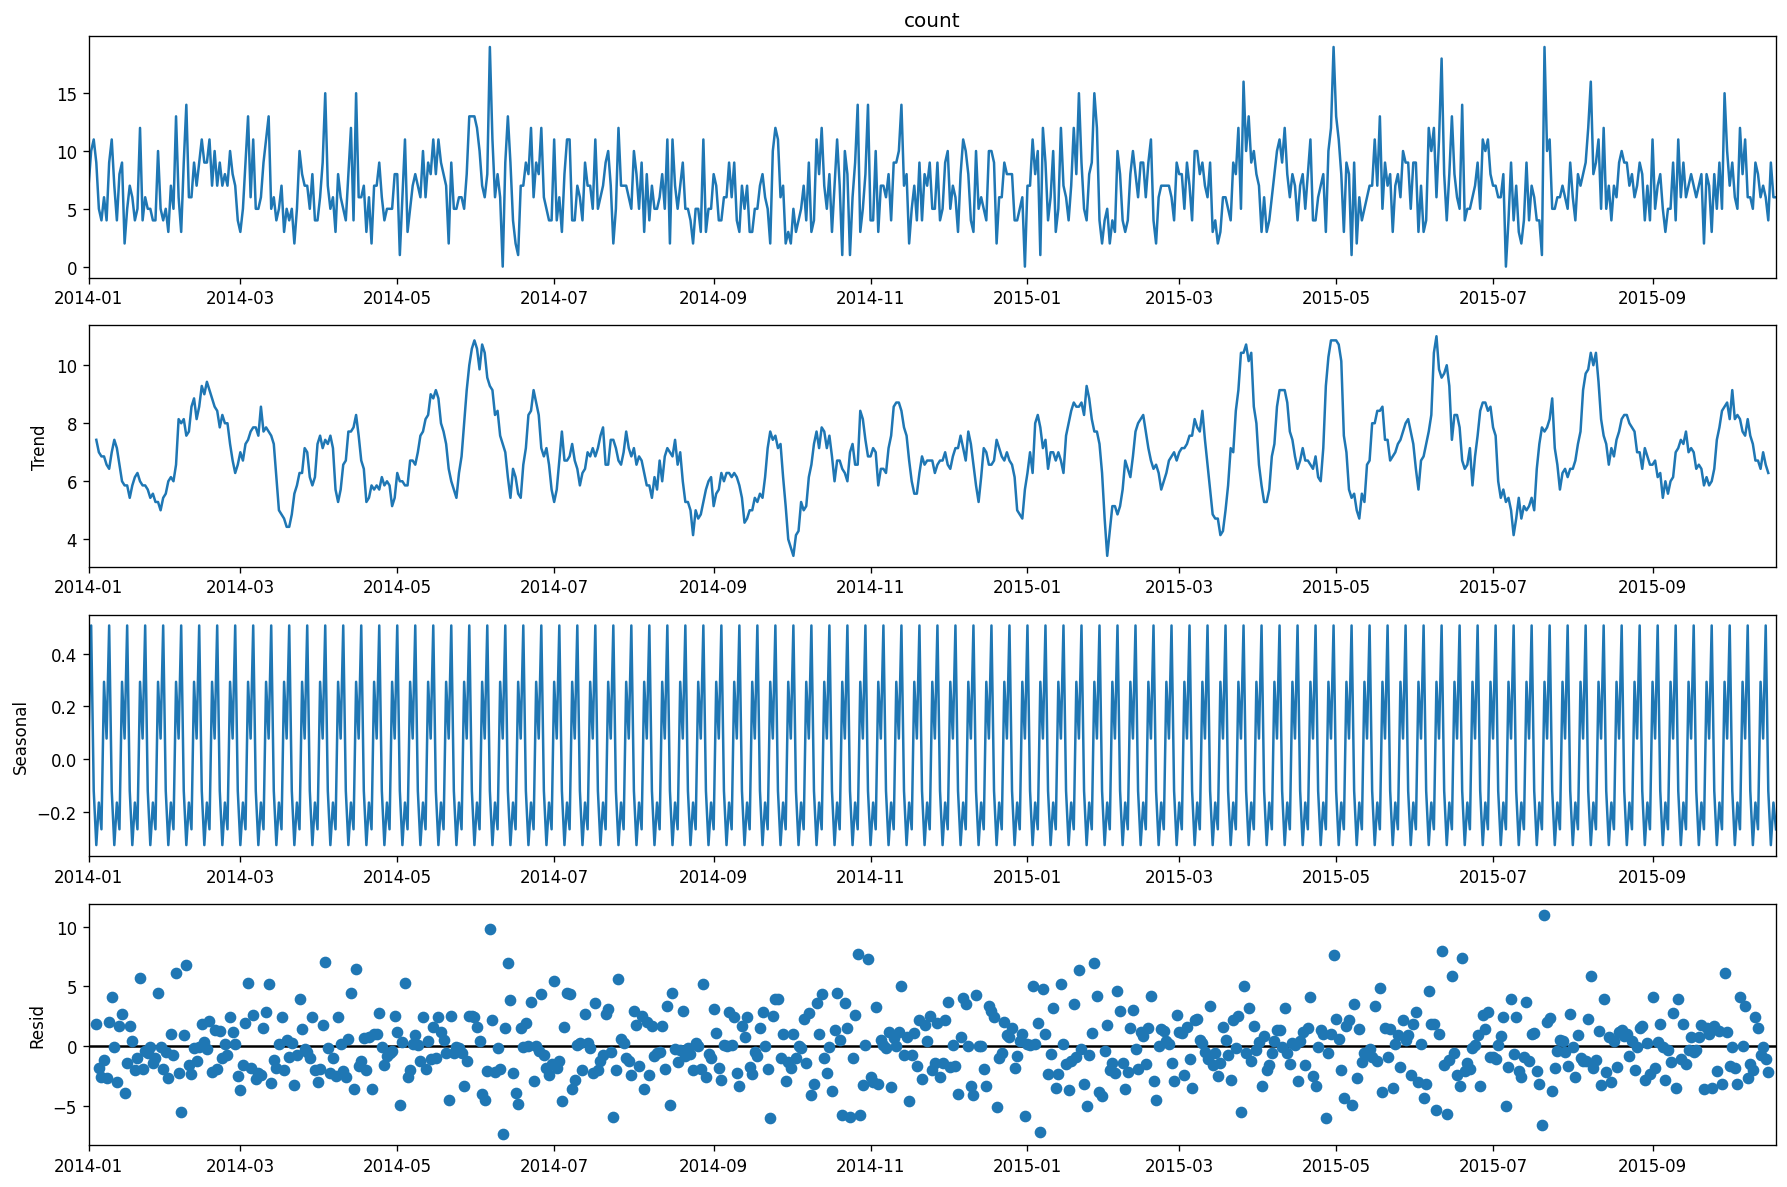

In [ ]:
#Decomposing out train dataset to analyse
train_df.index = train_df['Date']
decompose_result_mult = sm.tsa.seasonal_decompose(train_df['count'])
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
#Finding the right parameters using auto_arima
arima_model = pm.auto_arima(train_df['count'], start_p=0, start_q=0, max_p=5, max_q=5, start_P=0, start_Q=0, max_P=5, max_Q=5, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=0, D=0, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3319.630, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3304.956, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3306.701, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4531.034, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3305.714, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3306.023, Time=2.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3307.087, Time=2.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3618.620, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 6.192 seconds


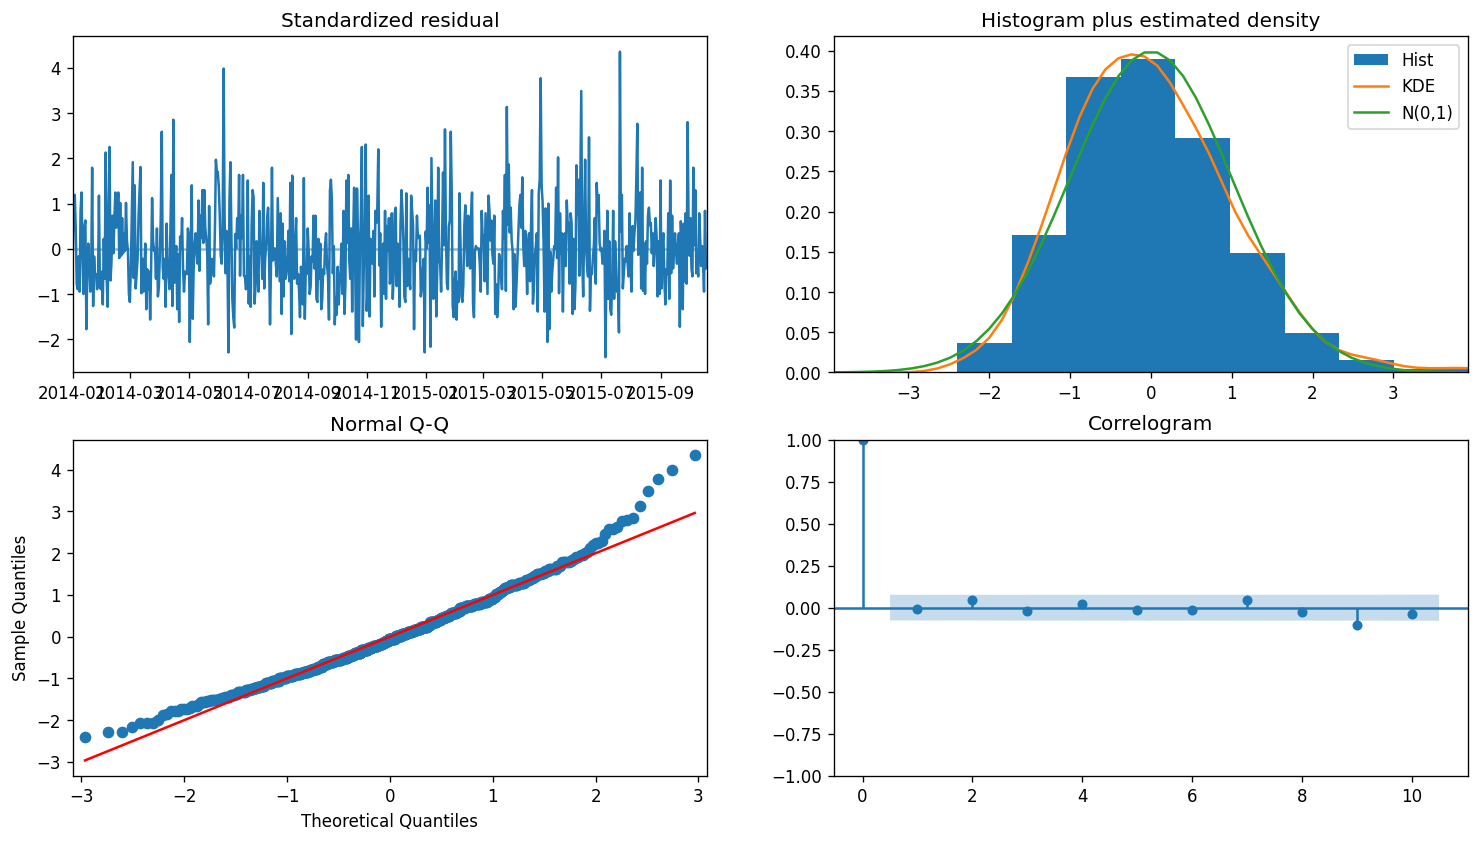

In [ ]:
arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Predicting demand(count) for the timeframe of the test data
pred = pd.DataFrame(arima_model.predict(72))
pred = np.array(pred)
len(pred)

72

In [ ]:
#Params for the trained model
print(arima_model.seasonal_order)
print(arima_model.order)

(0, 0, 0, 0)
(1, 0, 0)


In [ ]:
#Fitting the SARIMA model for the given params
model = SARIMAX(train_df['count'], order = arima_model.order, seasonal_order = arima_model.seasonal_order)
results = model.fit(disp = 0)
mean_forecast = results.get_forecast(steps = len(test_df)).predicted_mean
rmse = np.sqrt(mean_squared_error(mean_forecast, test_df['count']))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
# Printing the error for the SARIMA model
print("Error for SARIMA model:",rmse)

Error for SARIMA model: 7.363592305352441


In [ ]:
#Combinig the predicted and test data for plotting
fc = pd.DataFrame(mean_forecast)
fc.reset_index(drop = False,inplace = True)
tdf = test_df.merge(fc)

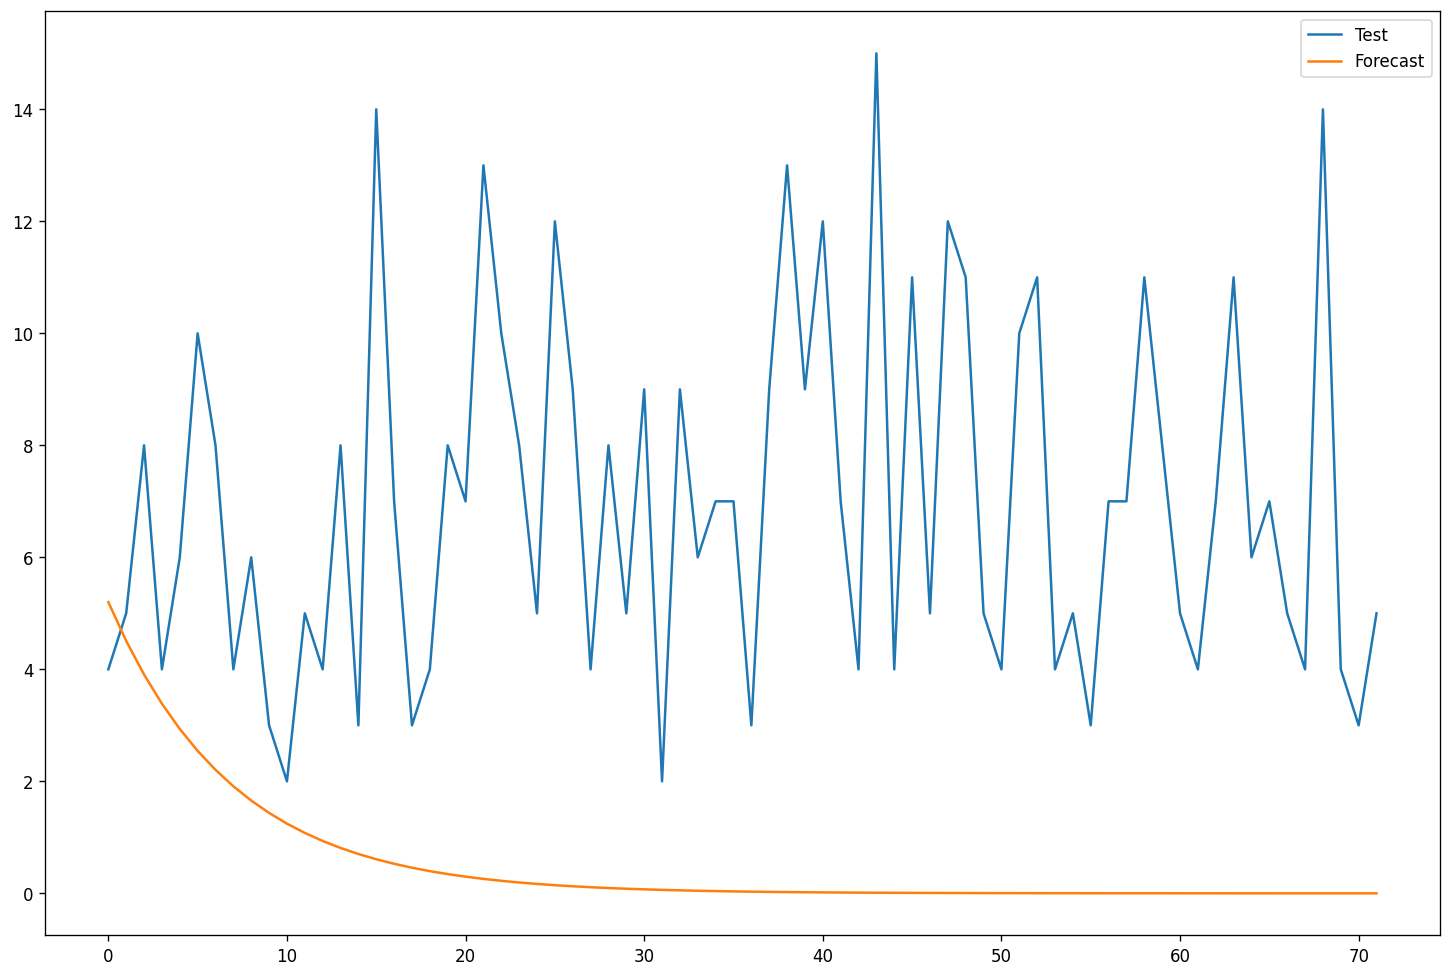

In [ ]:
plt.plot(tdf['count'], label = "Test")
plt.plot(tdf['predicted_mean'], label = "Forecast")
#plt.title("Region - {}, RMSE - {}".format(combined_regions_df[i]['Region'][0], rmse))
plt.legend()
plt.show()

#Walk forward cross validation

In [ ]:
#Walk forward optimisation
def evaluate_arima_model(train, test, order, seasonal_order):
	    history = [x for x in train]
	    predictions = list()
	    for t in range(len(test)):
	        model = SARIMAX(history, order=order, seasonal_order = seasonal_order, initialization='approximate_diffuse')
	        model_fit = model.fit(disp = 0)
	        yhat = model_fit.forecast()[0]
	        predictions.append(yhat)
	        history.append(test[t])
	    # calculate out of sample error
	    rmse = np.sqrt(mean_squared_error(test, predictions))
	    return rmse, predictions

In [ ]:
train_df.reset_index(drop = True,inplace = True)
test_df.reset_index(drop = True,inplace = True)

In [ ]:
test_df.head()

index  count
0 2015-10-20      4
1 2015-10-21      5
2 2015-10-22      8
3 2015-10-23      4
4 2015-10-24      6

In [ ]:
test_df.rename(columns = {'index' : 'Date'},inplace=True)

In [ ]:
#Evaluating the walk forward optimisation model
rmse,sarima_pred = evaluate_arima_model(train_df['count'],test_df['count'],arima_model.order,arima_model.seasonal_order)

In [ ]:
print("Error for the walk forward model:",rmse)

Error for the walk forward model: 4.469798157345109


In [ ]:
train_df.head()

Date  count
0 2014-01-01      7
1 2014-01-02     10
2 2014-01-03     11
3 2014-01-04      9
4 2014-01-05      5

#Prediction from Walk Forward Optimization

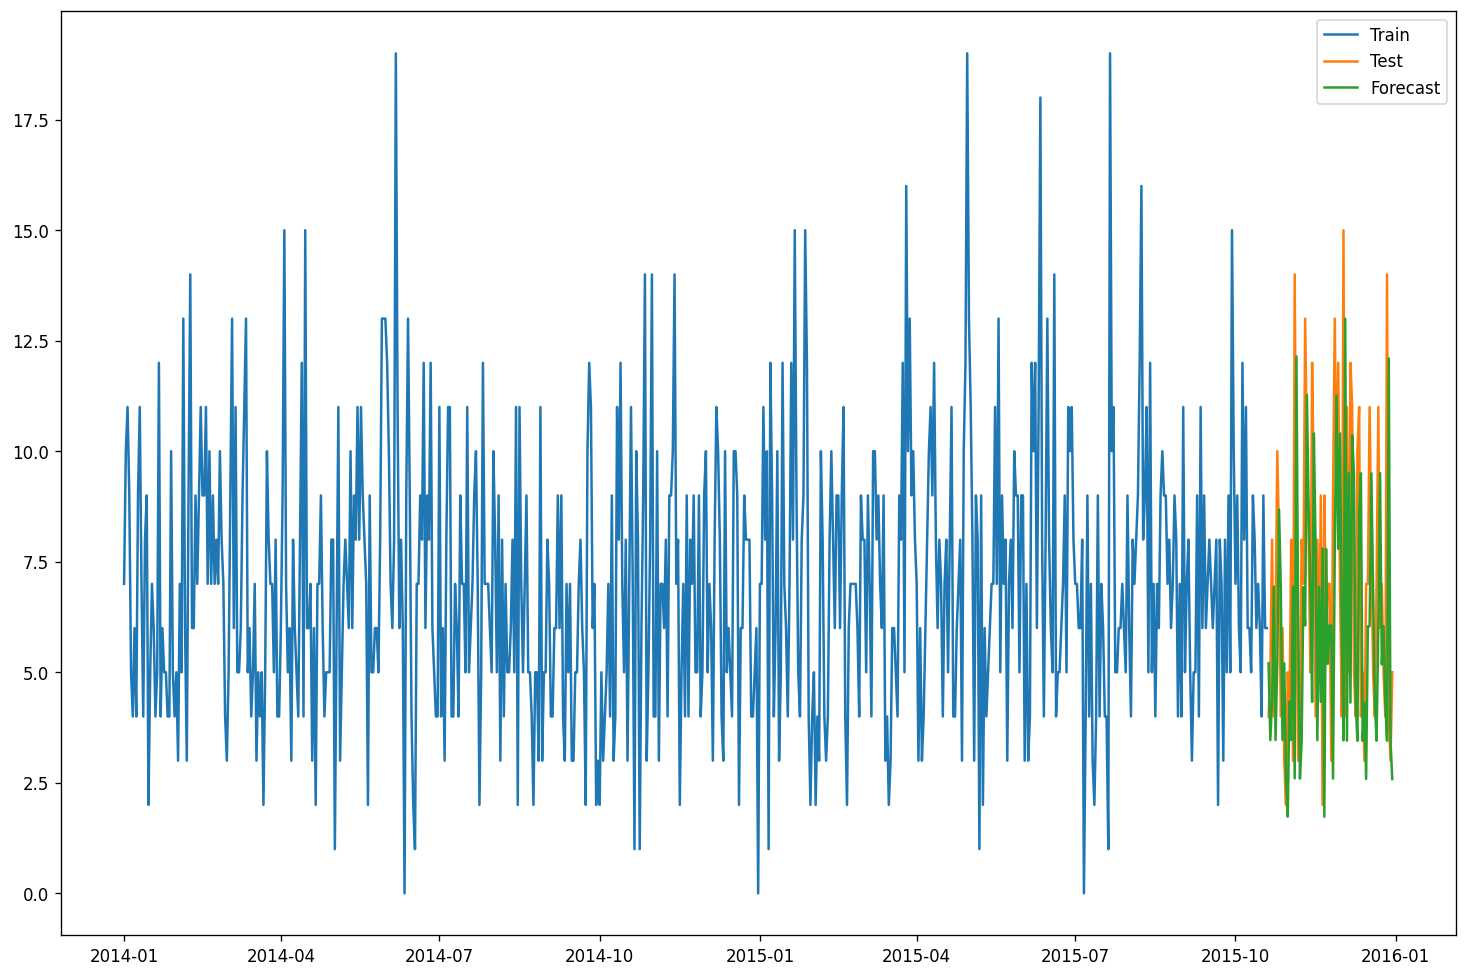

In [ ]:
plt.plot(train_df['Date'],train_df['count'], label = "Train")
plt.plot(test_df['Date'],test_df['count'], label = "Test")
plt.plot(test_df['Date'],sarima_pred, label = "Forecast")
#plt.title("Region - {}, RMSE - {}".format(combined_regions_df[i]['Region'][0], rmse))
plt.legend()
plt.show()

##Beverages (Daily) - Manual

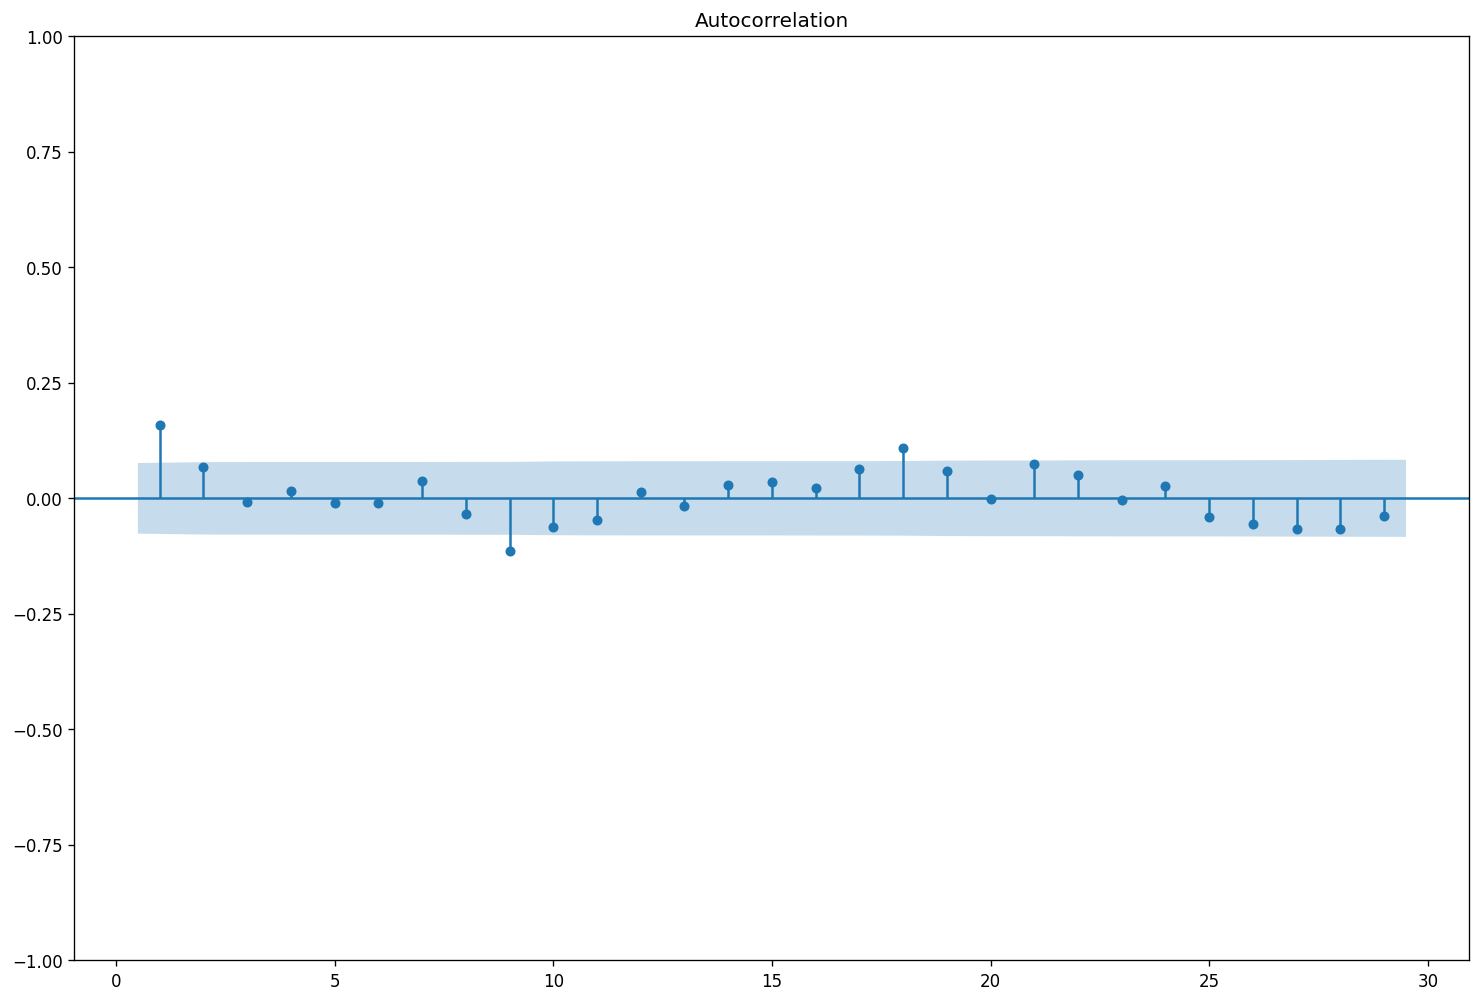

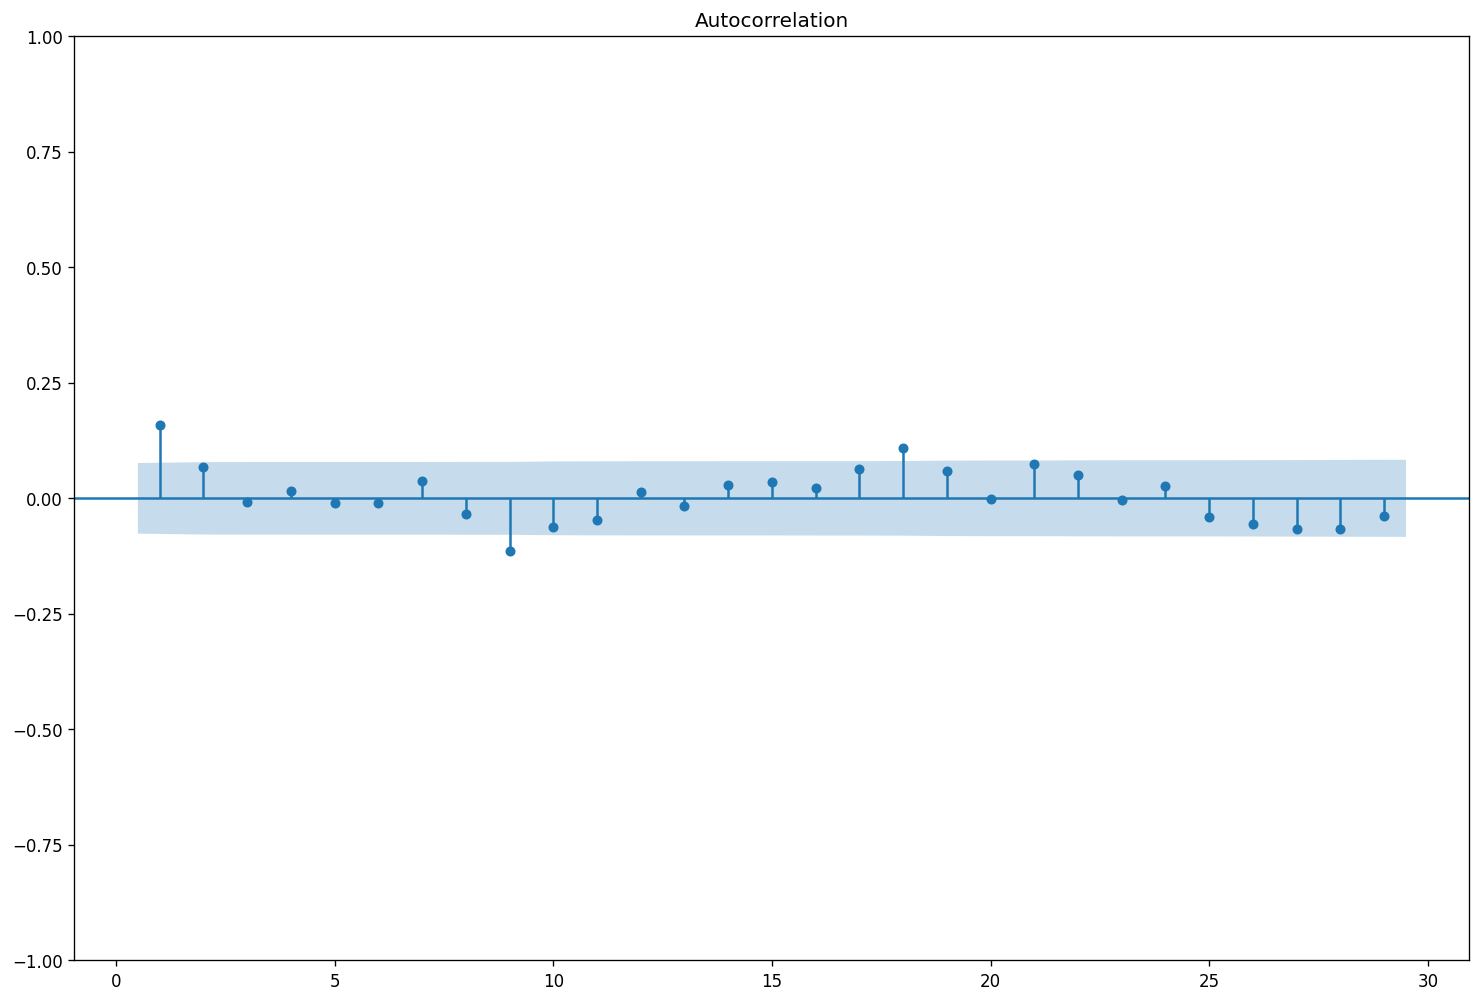

In [ ]:
#Plotting acf to visualize p paramter
plot_acf(train_df['count'],zero = False)

q = 1

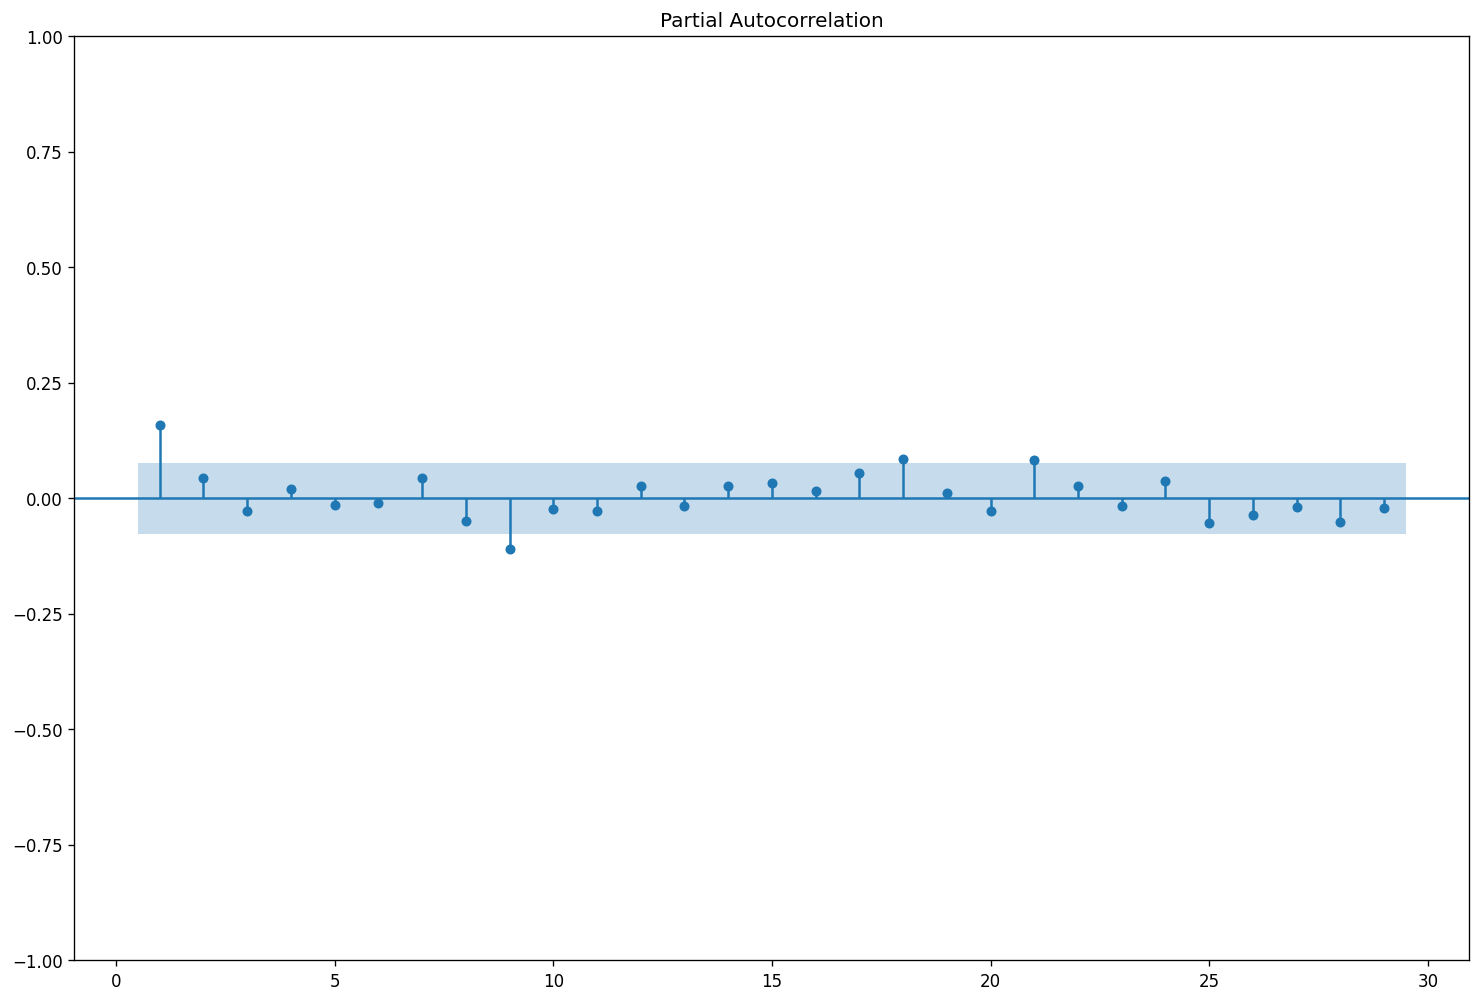

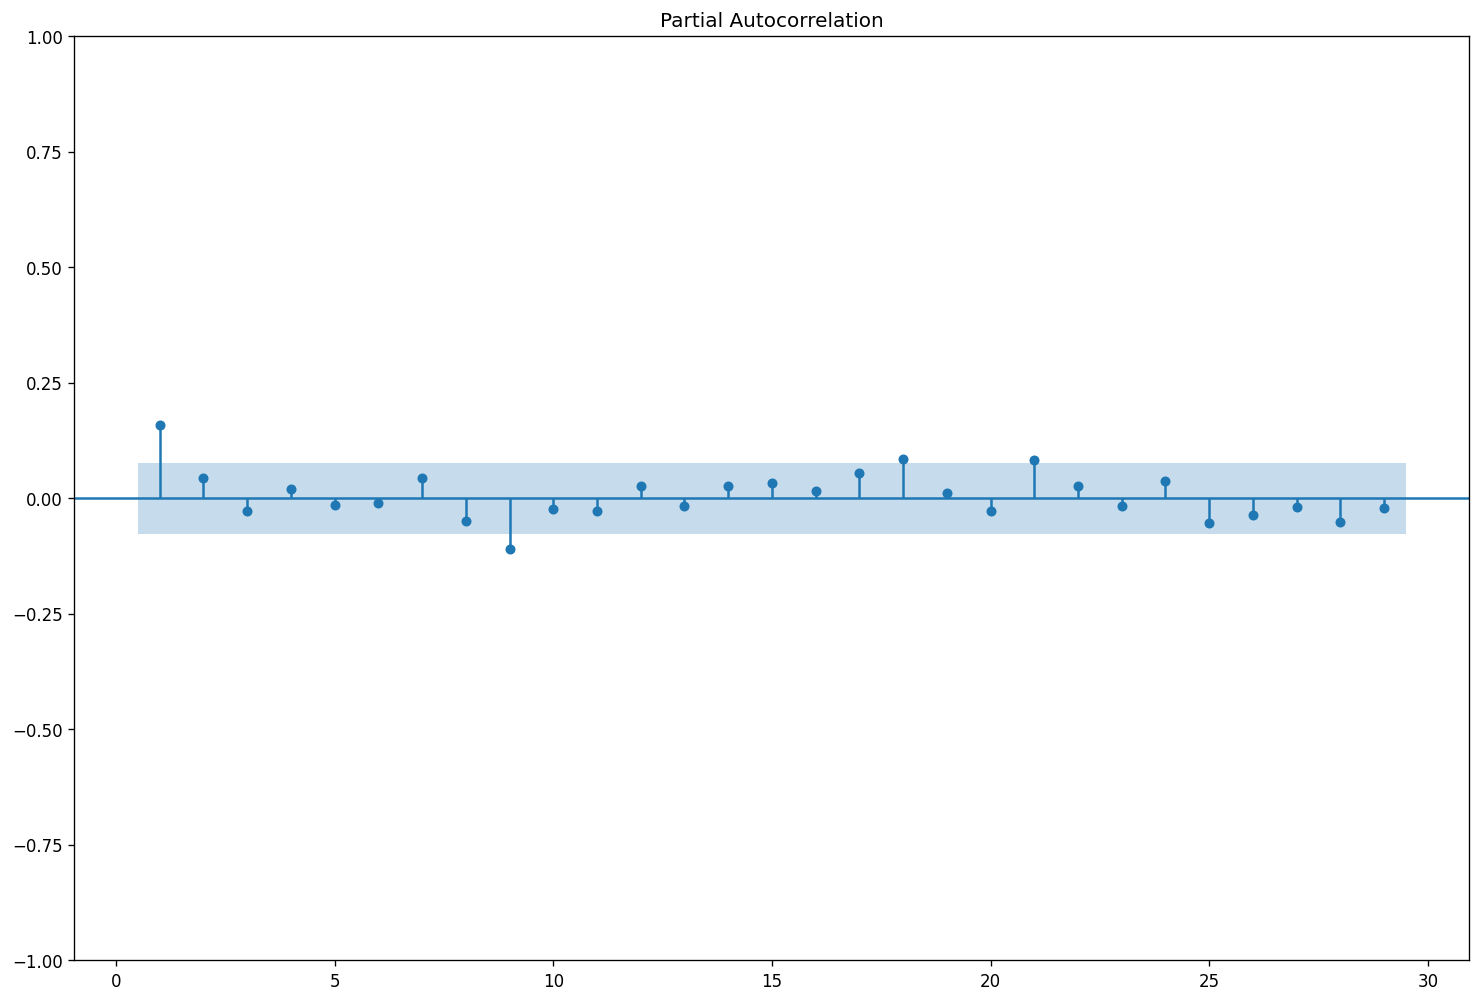

In [ ]:
#Plotting pacf to visualise q parameter
plot_pacf(train_df['count'],zero = False)

p = 1;
Given that the autocorrelation function showed evidence of stationarity, d is set to 0.

#Beverage demand(Prophet)

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.7.0
    Uninstalling pystan-3.7.0:
      Successfully uninstalled pystan-3.7.0
  error: subprocess-exited-with-error
  
  × Running setup.py install for pystan did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for pystan ... error
  Rolling back uninstall of pystan


In [ ]:
#t = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
t = bev_copy.copy()
t.head()


index  count
0 2014-01-01      7
1 2014-01-02     10
2 2014-01-03     11
3 2014-01-04      9
4 2014-01-05      5

In [ ]:
# t.index = t['index']
# t.drop(columns = ['index'],inplace = True)
t.rename(columns= {'index':'Date'},inplace=True)
t.head()

Date  count
0 2014-01-01      7
1 2014-01-02     10
2 2014-01-03     11
3 2014-01-04      9
4 2014-01-05      5

In [ ]:
# create pandas time series
t.date = pd.to_datetime(t.Date)
# t.drop('Date',axis=1,inplace=True)
t.head()

Date  count
0 2014-01-01      7
1 2014-01-02     10
2 2014-01-03     11
3 2014-01-04      9
4 2014-01-05      5

In [ ]:
ts = pd.DataFrame({'ds':t['Date'],'y':t['count']})
# ts = ts.reset_index()
# ts.drop('Date',inplace=True)
ts.head()

ds   y
0 2014-01-01   7
1 2014-01-02  10
2 2014-01-03  11
3 2014-01-04   9
4 2014-01-05   5

In [ ]:
!pip install pystan==2.17.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.7.0
    Uninstalling pystan-3.7.0:
      Successfully uninstalled pystan-3.7.0
  error: subprocess-exited-with-error
  
  × Running setup.py install for pystan did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for pystan ... error
  

In [ ]:
# instantiate the model and fit the timeseries
from fbprophet import Prophet
prophet = Prophet()
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=25,freq = 'D')
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast,xlabel = 'Days',ylabel = 'Count')

In [ ]:
# instantiate the model and fit the timeseries
import prophet
# prop = prophet()
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=25,freq = 'D')
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast,xlabel = 'Days',ylabel = 'Count')

In [ ]:
future = list()
for i in range(1, 13):
  date = '2016-01-%02d' % i
  future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
prophet = Prophet()
prophet.fit(ts)
forecast = prophet.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
prophet.plot(forecast)

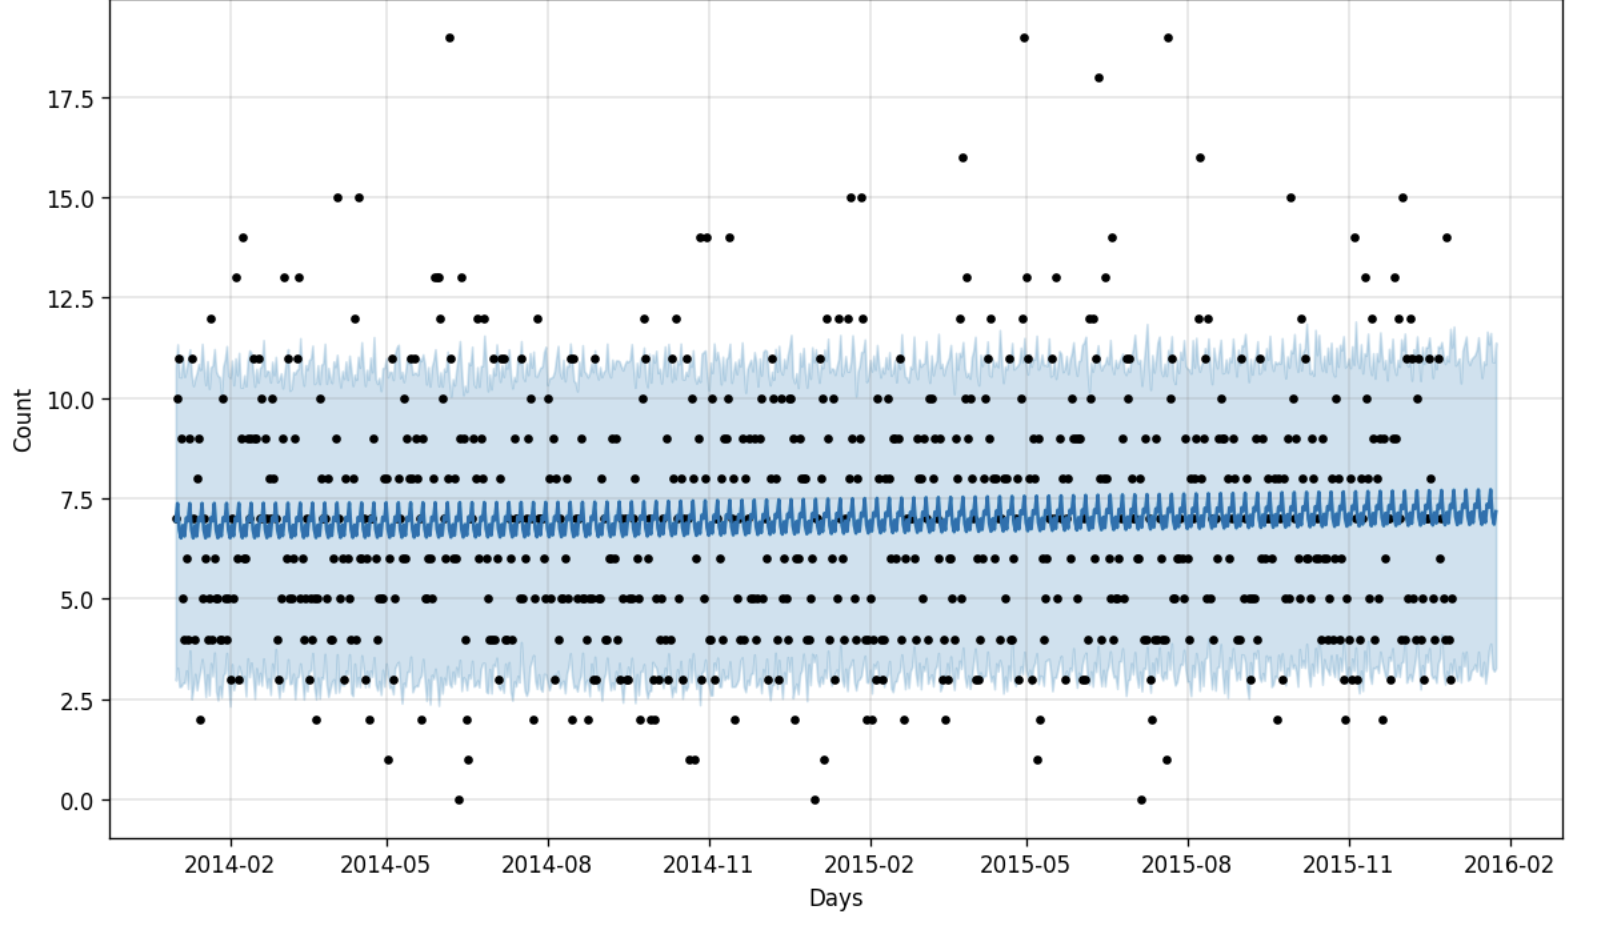

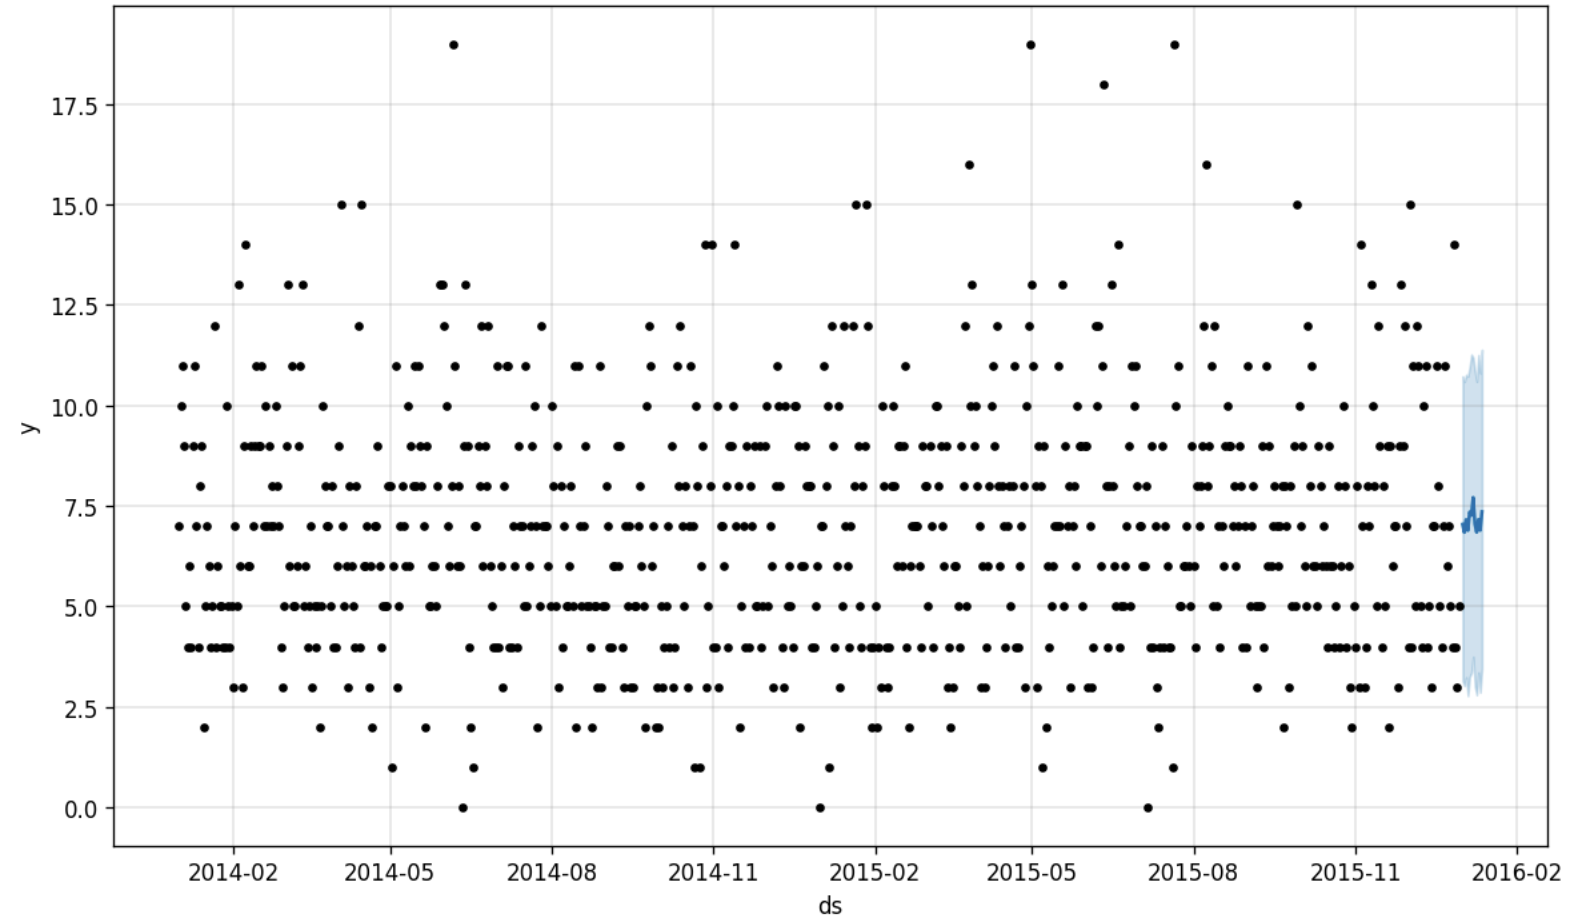

References:

1. https://tsanggeorge.medium.com/a-semi-auto-way-to-determine-parameters-for-sarima-model-74cdee853080

2. https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

3. https://xang1234.github.io/prophet/

4. https://audhiaprilliant.medium.com/walk-forward-optimization-cross-validation-technique-for-time-series-data-61739f58f2c0

5. https://pypi.org/project/fbprophet/

In [ ]:
bev.to_csv("Bev.csv")